# Milestone I. - Deep Learning 

## Data Preparation

In [1]:
import pandas as pd
#import pandas_profiling
import numpy as np
from collections import Counter

In [2]:
import matplotlib.pyplot as plt
#import seaborn as sns

### Attributes (not every one of them, yet)

In this document we would like to collect data from students (their matura exams results, degree result, language exams, personal data, secondary school type and place, taking part of a competition or not) and from these we create a database.
Then we will generate from existing data randomly data (but with the same frequences per coloumn). So now we could prevent sharing private data. After that we would like to seperate data to training and testing database.

**Highs schoool grades**
* Hungarian literature
* Hungarian language
* history
* mathematics
* foreign language
* natural science subject

**Exit exam (called _[matura](https://en.wikipedia.org/wiki/Matura)_) scores (level & percentage)**
* Hungaruan language and literature
* history
* mathematics
* a foreign language
* elective subject(s)

**Extra points** 
* Foreign language certificate (type, level) 
* OKTV/SZÉTV?

**Personal details** 
* Gender
* Years elapsed between time of matura examination and enrollment
* Type of secondary school
* Location type of secondary school

# Admission and diploma features 

**TODO** (later): 
* outlier detection

In [3]:
entrance_score_status=pd.read_excel("./data/2010-től felvett Felvételi és Oklevél_SQL-KÓDOLT-20190917.XLSX")

In [4]:
entrance_score_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39048 entries, 0 to 39047
Data columns (total 24 columns):
Szervezet neve                39048 non-null object
Hallgató_ID                   39048 non-null object
Képzés                        39048 non-null object
Képzési szint                 39048 non-null object
Képzési terület               39048 non-null object
Felvétel féléve               39048 non-null object
Státusz                       39048 non-null object
Képzés jogviszony kezdete     38437 non-null datetime64[ns]
Jogviszony keletkezés oka     39048 non-null object
Képzés jogviszony vége        24706 non-null datetime64[ns]
Jogviszony megszűnés oka      24706 non-null object
Pénzügyi státusz              39048 non-null object
Felvételkori pénzü_státusz    39034 non-null object
Felvételi összes pontszám     38280 non-null float64
Hozott/Tanulmányi pontszám    38279 non-null float64
Szerzett/Érettségi pontsz     38279 non-null float64
Többletpontszám               38279 non-

In [5]:
# profile = entrance_score_status.profile_report(title='Felvételi és Oklevél report')
# profile.to_file(output_file="felv_okl_report.html")

In [6]:
entrance_score_status.Státusz.unique()

array(['Diplomát szerzett', 'Elbocsátott', 'Törölt', 'Passzív', 'Aktív',
       'Záróvizsgát tett (NYV hiányzik)', 'Abszolvált', 'Elhunyt',
       'Felvett', 'Aktív (Nemzetközi program)',
       'Végzett (Vendéghallgató)', 'Képzés váltó'], dtype=object)

### We consider students as being graduated if they completed the required studies even if they did not obtain a degree certificate (e.g. due to the lack of the required language certificates)

In [7]:
# Végzettek: Diplomát szerzett, abszolvált, zv-t tett.
# Final status: graduated
entrance_status_clean = (entrance_score_status.query('Státusz in ["Diplomát szerzett", "Abszolvált", "Záróvizsgát tett (NYV hiányzik)" , "Elbocsátott"]')
                         .replace(["Diplomát szerzett", "Abszolvált", "Záróvizsgát tett (NYV hiányzik)"], "Végzett")
                         .reset_index(drop=True))
entrance_status_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24682 entries, 0 to 24681
Data columns (total 24 columns):
Szervezet neve                24682 non-null object
Hallgató_ID                   24682 non-null object
Képzés                        24682 non-null object
Képzési szint                 24682 non-null object
Képzési terület               24682 non-null object
Felvétel féléve               24682 non-null object
Státusz                       24682 non-null object
Képzés jogviszony kezdete     24682 non-null datetime64[ns]
Jogviszony keletkezés oka     24682 non-null object
Képzés jogviszony vége        24682 non-null datetime64[ns]
Jogviszony megszűnés oka      24682 non-null object
Pénzügyi státusz              24682 non-null object
Felvételkori pénzü_státusz    24682 non-null object
Felvételi összes pontszám     24140 non-null float64
Hozott/Tanulmányi pontszám    24139 non-null float64
Szerzett/Érettségi pontsz     24139 non-null float64
Többletpontszám               24139 non-

In [8]:
len(entrance_status_clean)

24682

In [9]:
entrance_status_clean.columns = entrance_status_clean.columns.str.replace(' ', '_')

In [10]:
entrance_status_clean.dtypes

Szervezet_neve                        object
Hallgató_ID                           object
Képzés                                object
Képzési_szint                         object
Képzési_terület                       object
Felvétel_féléve                       object
Státusz                               object
Képzés_jogviszony_kezdete     datetime64[ns]
Jogviszony_keletkezés_oka             object
Képzés_jogviszony_vége        datetime64[ns]
Jogviszony_megszűnés_oka              object
Pénzügyi_státusz                      object
Felvételkori_pénzü_státusz            object
Felvételi_összes_pontszám            float64
Hozott/Tanulmányi_pontszám           float64
Szerzett/Érettségi_pontsz            float64
Többletpontszám                      float64
Törzspontszám                        float64
Jogszabályi_pontszám                 float64
Oklevél_állapot                       object
Oklevél_eredménye                     object
Képzettség                           float64
Végzettség

In [11]:
entrance_status_clean['ID'] = entrance_status_clean.Hallgató_ID + entrance_status_clean.Képzés + entrance_status_clean.Felvétel_féléve

### 5 different types of financial status 

In [12]:
entrance_status_clean['Felvételkori_pénzü_státusz'].unique()

array(['Állami ösztöndíjas', 'Államilag támogatott', 'Költségtérítéses',
       'Önköltséges', 'Állami részösztöndíjas'], dtype=object)

In [13]:
entrance_status_clean.replace(['Állami ösztöndíjas', 'Állami részösztöndíjas'], 'Államilag támogatott', inplace=True)

In [14]:
entrance_status_clean.replace("Költségtérítéses", "Önköltséges", inplace=True)

### There are 5 duplicated rows, but only the "Oklevél_állapot" feature differs in these rows. Oklevél_állapot denotes wether the diploma is original ('Eredeti'), a copy ('Másolat'), or it has been corrected ('Javított').

In [15]:
entrance_status_clean.duplicated(subset=['ID']).sum()

5

In [16]:
entrance_status_clean[entrance_status_clean.duplicated(subset=['ID'], keep=False)]

,Szervezet_neve,Hallgató_ID,Képzés,Képzési_szint,Képzési_terület,Felvétel_féléve,Státusz,Képzés_jogviszony_kezdete,Jogviszony_keletkezés_oka,Képzés_jogviszony_vége,...,Szerzett/Érettségi_pontsz,Többletpontszám,Törzspontszám,Jogszabályi_pontszám,Oklevél_állapot,Oklevél_eredménye,Képzettség,Végzettség,Oklevél_eredménye_számmal,ID
4127,Villamosmérnöki és Informatikai Kar,H205884130,5N-A8,alapképzés (BA/BSc),informatika,2010/11/1,Végzett,2010-09-01 00:00:00,Felvétel,2015-02-06,...,162.0,40.0,336.0,376.0,Javított,jó,NaN,mérnökinformatikus,3.60,H2058841305N-A82010/11/1
4128,Villamosmérnöki és Informatikai Kar,H205884130,5N-A8,alapképzés (BA/BSc),informatika,2010/11/1,Végzett,2010-09-01 00:00:00,Felvétel,2015-02-06,...,162.0,40.0,336.0,376.0,Eredeti,jó,NaN,mérnökinformatikus,3.60,H2058841305N-A82010/11/1
4395,Gazdaság- és Társadalomtudományi Kar,H205890515,7N-AAK01,alapképzés (BA/BSc),gazdaságtudományok,2010/11/1,Végzett,2010-09-01 16:05:05,Felvétel,2017-01-27,...,147.0,75.0,308.0,348.0,Másodlat,közepes,NaN,közgazdász alkalmazott közgazdaságtan alapképz...,3.41,H2058905157N-AAK012010/11/1
4396,Gazdaság- és Társadalomtudományi Kar,H205890515,7N-AAK01,alapképzés (BA/BSc),gazdaságtudományok,2010/11/1,Végzett,2010-09-01 16:05:05,Felvétel,2017-01-27,...,147.0,75.0,308.0,348.0,Eredeti,közepes,NaN,közgazdász alkalmazott közgazdaságtan alapképz...,3.41,H2058905157N-AAK012010/11/1
8181,Vegyészmérnöki és Biomérnöki Kar,H279975915,4N-A2,alapképzés (BA/BSc),műszaki,2011/12/1,Végzett,2011-09-01 00:00:00,Felvétel,2015-02-06,...,183.0,68.0,375.0,415.0,Másodlat,kiváló,NaN,vegyészmérnök,4.70,H2799759154N-A22011/12/1
8182,Vegyészmérnöki és Biomérnöki Kar,H279975915,4N-A2,alapképzés (BA/BSc),műszaki,2011/12/1,Végzett,2011-09-01 00:00:00,Felvétel,2015-02-06,...,183.0,68.0,375.0,415.0,Eredeti,kiváló,NaN,vegyészmérnök,4.70,H2799759154N-A22011/12/1
11578,Természettudományi Kar,H343422303,9N-AF06,alapképzés (BA/BSc),természettudomány,2012/13/1,Végzett,2012-09-01 00:00:00,Felvétel,2016-07-01,...,142.0,100.0,319.0,419.0,Eredeti,jó,NaN,fizikus,3.57,H3434223039N-AF062012/13/1
11579,Természettudományi Kar,H343422303,9N-AF06,alapképzés (BA/BSc),természettudomány,2012/13/1,Végzett,2012-09-01 00:00:00,Felvétel,2016-07-01,...,142.0,100.0,319.0,419.0,Eredeti,NaN,NaN,NaN,NaN,H3434223039N-AF062012/13/1
15178,Villamosmérnöki és Informatikai Kar,H457421360,5N-A7,alapképzés (BA/BSc),műszaki,2013/14/1,Végzett,2013-09-01 00:00:00,Felvétel,2017-01-27,...,190.0,100.0,381.0,431.0,Másodlat,jó,NaN,villamosmérnök,4.27,H4574213605N-A72013/14/1
15179,Villamosmérnöki és Informatikai Kar,H457421360,5N-A7,alapképzés (BA/BSc),műszaki,2013/14/1,Végzett,2013-09-01 00:00:00,Felvétel,2017-01-27,...,190.0,100.0,381.0,431.0,Eredeti,jó,NaN,villamosmérnök,4.27,H4574213605N-A72013/14/1


In [17]:
entrance_status_clean.drop_duplicates(subset=['ID'], inplace=True)

### Re-enrolled (Rególyák)
Those who have been the university's students before, dropped out for some resason and then re-enrolled again.

In [18]:
#Students has been ordered by admission starting semester
#Hallgatók sorbarendezése felvétel féléve szerint
entrance_status_clean.sort_values(by=['Hallgató_ID', 'Felvétel_féléve'], inplace=True) 
#True if they have already enrolled for at least one vocational
#True ha már legalább egyszer egy szakra be volt iratkozva
entrance_status_clean=pd.concat([entrance_status_clean, pd.Series(entrance_status_clean.duplicated(subset=['Hallgató_ID']), name='re_enrolled')], axis=1) 

### Those students, who changed their major, appear as dropouts at their previous undergraduate program.
( Azok a diákok akik úgy döntöttek, hogy inkább másik képzésen folytatják tanulmányaikat, elbocsátottként szerepelnek a korábbi szakon.)

In [19]:
entrance_status_clean[entrance_status_clean['Jogviszony_megszűnés_oka']=='Képzésváltás intézményen belül'].head(10)

,Szervezet_neve,Hallgató_ID,Képzés,Képzési_szint,Képzési_terület,Felvétel_féléve,Státusz,Képzés_jogviszony_kezdete,Jogviszony_keletkezés_oka,Képzés_jogviszony_vége,...,Többletpontszám,Törzspontszám,Jogszabályi_pontszám,Oklevél_állapot,Oklevél_eredménye,Képzettség,Végzettség,Oklevél_eredménye_számmal,ID,re_enrolled
20,Gépészmérnöki Kar,H114070513,2N-AG0,alapképzés (BA/BSc),műszaki,2010/11/1,Elbocsátott,2010-09-01 00:00:00,Felvétel,2012-08-31,...,75.0,303.0,343.0,Eredeti,NaN,NaN,gépészmérnök,NaN,H1140705132N-AG02010/11/1,False
53,Építészmérnöki Kar,H114072825,3N-A0,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-07 00:00:00,Képzésváltás intézményen belül,2012-01-31,...,NaN,NaN,NaN,Eredeti,NaN,NaN,építészmérnök,NaN,H1140728253N-A02011/12/1,False
66,Építészmérnöki Kar,H114075086,3N-A0,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2014-01-31,...,80.0,319.0,359.0,Eredeti,NaN,NaN,építészmérnök,NaN,H1140750863N-A02011/12/1,False
189,Gépészmérnöki Kar,H114092172,2N-AG0,alapképzés (BA/BSc),műszaki,2012/13/1,Elbocsátott,2012-09-01 18:12:16,Felvétel,2015-08-31,...,40.0,362.0,362.0,Eredeti,NaN,NaN,gépészmérnök,NaN,H1140921722N-AG02012/13/1,True
285,Közlekedésmérnöki és Járműmérnöki Kar,H114103808,6N-AJ,alapképzés (BA/BSc),műszaki,2018/19/1,Elbocsátott,2018-09-01 00:00:00,Felvétel,2018-09-02,...,78.0,NaN,450.0,NaN,NaN,NaN,NaN,NaN,H1141038086N-AJ2018/19/1,True
291,Gazdaság- és Társadalomtudományi Kar,H114104453,7N-AGM02,alapképzés (BA/BSc),gazdaságtudományok,2010/11/1,Elbocsátott,2010-09-01 00:00:00,Felvétel,2012-08-31,...,60.0,276.0,276.0,Eredeti,NaN,NaN,közgazdász gazdálkodási és menedzsment alapkép...,NaN,H1141044537N-AGM022010/11/1,False
294,Gépészmérnöki Kar,H114104663,2N-AG0,alapképzés (BA/BSc),műszaki,2016/17/1,Elbocsátott,2016-09-01 00:00:00,Felvétel,2016-09-04,...,90.0,358.0,448.0,NaN,NaN,NaN,NaN,NaN,H1141046632N-AG02016/17/1,True
327,Közlekedésmérnöki és Járműmérnöki Kar,H114109389,6N-A0,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2013-08-31,...,40.0,316.0,316.0,Eredeti,NaN,NaN,közlekedésmérnök,NaN,H1141093896N-A02011/12/1,True
330,Építészmérnöki Kar,H114109416,3N-A0,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2014-01-31,...,40.0,362.0,362.0,Eredeti,NaN,NaN,építészmérnök,NaN,H1141094163N-A02011/12/1,False
589,Építészmérnöki Kar,H157225218,3N-A0,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2014-01-31,...,80.0,310.0,350.0,Eredeti,NaN,NaN,építészmérnök,NaN,H1572252183N-A02011/12/1,False


In [20]:
len(entrance_status_clean[entrance_status_clean['Jogviszony_megszűnés_oka']=='Képzésváltás intézményen belül'])

615

#### We exclude these 615 rows from the dataset.

In [21]:
entrance_status_clean = entrance_status_clean[entrance_status_clean['Jogviszony_megszűnés_oka']!='Képzésváltás intézményen belül']

####  Until 2012, the maximum university entrance score 480, because the maximum obtainable extra points were 80. Since 2012 the extra points can be at most 100, hence the maximum entrance score is 500. We need to rescale the entrance score of the students, who enrolled before 2012. 

In [22]:
entrance_status_clean['felvi_osszes_skalazott'] = entrance_status_clean.apply(lambda row: row['Felvételi_összes_pontszám'] if int(str(row['Felvétel_féléve'])[0:4])>=2012 else row['Felvételi_összes_pontszám']+ row['Többletpontszám']*0.25, axis=1)

In [23]:
entrance_status_clean['tobblet_skalazott'] = entrance_status_clean.apply(lambda row: row['Többletpontszám'] if int(str(row['Felvétel_féléve'])[0:4])>=2012 else row['Többletpontszám']*1.25, axis=1)

In [24]:
entrance_status_clean[['felvi_osszes_skalazott', 'Felvételi_összes_pontszám']].describe()

,felvi_osszes_skalazott,Felvételi_összes_pontszám
count,23536.000000,23536.000000
mean,416.573706,411.380608
std,38.403187,36.871475
min,0.000000,0.000000
25%,390.000000,385.000000
50%,417.000000,412.000000
75%,446.000000,440.000000
max,500.000000,500.000000


In [25]:
entrance_status_clean[['Többletpontszám', 'tobblet_skalazott']].describe()

,Többletpontszám,tobblet_skalazott
count,23535.000000,23535.000000
mean,68.226769,73.420087
std,25.186444,26.178098
min,0.000000,0.000000
25%,48.000000,50.000000
50%,78.000000,78.000000
75%,90.000000,93.750000
max,100.000000,100.000000


In [26]:
entrance_status_clean.columns

Index(['Szervezet_neve', 'Hallgató_ID', 'Képzés', 'Képzési_szint',
       'Képzési_terület', 'Felvétel_féléve', 'Státusz',
       'Képzés_jogviszony_kezdete', 'Jogviszony_keletkezés_oka',
       'Képzés_jogviszony_vége', 'Jogviszony_megszűnés_oka',
       'Pénzügyi_státusz', 'Felvételkori_pénzü_státusz',
       'Felvételi_összes_pontszám', 'Hozott/Tanulmányi_pontszám',
       'Szerzett/Érettségi_pontsz', 'Többletpontszám', 'Törzspontszám',
       'Jogszabályi_pontszám', 'Oklevél_állapot', 'Oklevél_eredménye',
       'Képzettség', 'Végzettség', 'Oklevél_eredménye_számmal', 'ID',
       're_enrolled', 'felvi_osszes_skalazott', 'tobblet_skalazott'],
      dtype='object')

__Meg kell majd gondolni hogy innen milyen attributumokra van szükségünk__
* Igazából a ha megvannak az érettségi, középsulis stb eredmények akkor a felvételi/hozott/szerzett/többlet pontszám már semmi plusz információt nem tartalmaz a diákokról. 
* Baj viszont az hogy érettségi adatok 2013tól vannak csak. Csinálhatunk egy olyan data-setet ahol a felvételi/hozott/szerzett/többlet pontszámok alapján imputáljuk az érettségi adatokat a 2012 előttieknek

In [27]:
entrance_status_clean= entrance_status_clean[['ID', 'Hallgató_ID', 'Szervezet_neve', 'Képzés', 'Felvétel_féléve', 'felvi_osszes_skalazott', 'Hozott/Tanulmányi_pontszám',
       'Szerzett/Érettségi_pontsz', 'tobblet_skalazott', 'Státusz', 'Oklevél_eredménye_számmal', 'Felvételkori_pénzü_státusz', 're_enrolled']]

In [28]:
entrance_status_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24062 entries, 1 to 24681
Data columns (total 13 columns):
ID                            24062 non-null object
Hallgató_ID                   24062 non-null object
Szervezet_neve                24062 non-null object
Képzés                        24062 non-null object
Felvétel_féléve               24062 non-null object
felvi_osszes_skalazott        23536 non-null float64
Hozott/Tanulmányi_pontszám    23535 non-null float64
Szerzett/Érettségi_pontsz     23535 non-null float64
tobblet_skalazott             23535 non-null float64
Státusz                       24062 non-null object
Oklevél_eredménye_számmal     13166 non-null float64
Felvételkori_pénzü_státusz    24062 non-null object
re_enrolled                   24062 non-null bool
dtypes: bool(1), float64(5), object(7)
memory usage: 2.4+ MB


In [29]:
entrance_status_clean.reset_index(drop=True, inplace=True)

In [30]:
writer = pd.ExcelWriter('./data/clean/felv_okl_clean.xlsx')
entrance_status_clean.to_excel(writer,'Sheet1')
writer.save()

In [31]:
entrance_status_clean=pd.read_excel("./data/clean/felv_okl_clean.xlsx")

In [32]:
entrance_status_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24062 entries, 0 to 24061
Data columns (total 14 columns):
Unnamed: 0                    24062 non-null int64
ID                            24062 non-null object
Hallgató_ID                   24062 non-null object
Szervezet_neve                24062 non-null object
Képzés                        24062 non-null object
Felvétel_féléve               24062 non-null object
felvi_osszes_skalazott        23536 non-null float64
Hozott/Tanulmányi_pontszám    23535 non-null float64
Szerzett/Érettségi_pontsz     23535 non-null float64
tobblet_skalazott             23535 non-null float64
Státusz                       24062 non-null object
Oklevél_eredménye_számmal     13166 non-null float64
Felvételkori_pénzü_státusz    24062 non-null object
re_enrolled                   24062 non-null bool
dtypes: bool(1), float64(5), int64(1), object(7)
memory usage: 2.4+ MB


In [33]:
entrance_status_clean.head()

,Unnamed: 0,ID,Hallgató_ID,Szervezet_neve,Képzés,Felvétel_féléve,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Státusz,Oklevél_eredménye_számmal,Felvételkori_pénzü_státusz,re_enrolled
0,0,H1140690795N-A82011/12/1,H114069079,Villamosmérnöki és Informatikai Kar,5N-A8,2011/12/1,417.00,150.0,166.0,85.00,Elbocsátott,NaN,Államilag támogatott,False
1,1,H1140690795N-A82012/13/1,H114069079,Villamosmérnöki és Informatikai Kar,5N-A8,2012/13/1,410.00,148.0,166.0,78.00,Végzett,3.55,Államilag támogatott,True
2,2,H1140691057N-ANG052010/11/1,H114069105,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2010/11/1,467.75,170.0,187.0,93.75,Elbocsátott,NaN,Önköltséges,False
3,3,H1140691057N-ANG052011/12/1,H114069105,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2011/12/1,459.00,170.0,187.0,85.00,Végzett,3.62,Államilag támogatott,True
4,4,H1140691331N-AEM2011/12/1,H114069133,Építőmérnöki Kar,1N-AEM,2011/12/1,387.00,0.0,176.0,35.00,Elbocsátott,NaN,Államilag támogatott,False


## Érettségi adatok / Matura related data

In [34]:
matura = pd.read_excel("./data/Gólya, Középsuli, személyes/Gólya Érettségi 20190218-KÓDOLT.XLSX")

In [35]:
matura.columns

Index(['Hallgató_ID', 'Neptun Képzés', 'Neptun Felvétel féléve',
       'Bizonyítvány típus', 'Dátum', 'Érettségi tárgy', 'Jegy',
       'Középiskolai tárgy', 'Nyelv', 'Ország', 'Százalék', 'Szint',
       'Fájl neve'],
      dtype='object')

In [36]:
# matura.profile_report(style={'full_width':True})

In [37]:
matura.Ország.unique()

array([nan, 'Magyarország', 'Afganisztán', 'Ukrajna', 'Szíria', 'Románia',
       'Szerbia', 'Szlovákia', 'Amerikai Egyesült Államok', 'Oroszország',
       'Egyesült Arab Emírségek', 'Németország', 'Belgium', 'Kanada',
       'Dél-Afrika', 'Omán', 'Mongólia', 'Olaszország', 'Görögország',
       'Líbia', 'Egyesült Királyság', 'Litvánia', 'Ausztria',
       'Törökország', 'Ciprus', 'Brazília', 'Portugália', 'Finnország',
       'Svédország', 'Izland'], dtype=object)

In [38]:
len(matura)

103658

__Probably we should only consider hungarian students, because foreign students usually have missing matura exam related data.__  

In [39]:
matura = matura[matura.Ország == 'Magyarország']

In [40]:
matura.columns

Index(['Hallgató_ID', 'Neptun Képzés', 'Neptun Felvétel féléve',
       'Bizonyítvány típus', 'Dátum', 'Érettségi tárgy', 'Jegy',
       'Középiskolai tárgy', 'Nyelv', 'Ország', 'Százalék', 'Szint',
       'Fájl neve'],
      dtype='object')

In [41]:
len(matura)

96033

In [42]:
matura.columns = matura.columns.str.replace(' ', '_')

In [43]:
matura.Hallgató_ID = matura.Hallgató_ID.astype(str)
matura['ID'] = matura.Hallgató_ID + matura['Neptun_Képzés'] + matura['Neptun_Felvétel_féléve']
matura.drop(columns=['Dátum','Jegy','Nyelv','Ország','Fájl_neve','Neptun_Felvétel_féléve','Neptun_Képzés'], inplace=True)

def isNaN(num):
    return num != num

In [44]:
matura.head()

,Hallgató_ID,Bizonyítvány_típus,Érettségi_tárgy,Középiskolai_tárgy,Százalék,Szint,ID
67,H157219115,Bizonyítvány,fizika,NaN,80.0,közép,H1572191151N-AEM2013/14/1
68,H76825500,Bizonyítvány,angol,NaN,80.0,közép,H768255001N-AEM2013/14/1
69,H76825500,Bizonyítvány,fizika,NaN,72.0,közép,H768255001N-AEM2013/14/1
70,H76825500,Bizonyítvány,magyar nyelv és irodalom,NaN,81.0,közép,H768255001N-AEM2013/14/1
71,H76825500,Bizonyítvány,matematika,NaN,74.0,közép,H768255001N-AEM2013/14/1


In [45]:
matura[~isNaN(matura['Középiskolai_tárgy'])]

,Hallgató_ID,Bizonyítvány_típus,Érettségi_tárgy,Középiskolai_tárgy,Százalék,Szint,ID
1731,H21212188,Bizonyítvány,NaN,számítástechnika,79.0,közép,H212121882N-AG02013/14/1
4315,H457971800,Bizonyítvány,NaN,gépszerkezettan,59.0,közép,H4579718007L-AMS012013/14/1
4316,H457971800,Bizonyítvány,NaN,szakmai gyakorlat,79.0,közép,H4579718007L-AMS012013/14/1
4685,H457978992,Bizonyítvány,NaN,szakmai gyakorlat,79.0,közép,H4579789927L-AMS012013/14/1
4686,H457978992,Bizonyítvány,NaN,szakmai ismeretek,39.0,közép,H4579789927L-AMS012013/14/1
...,...,...,...,...,...,...,...
100991,H792966160,Bizonyítvány,NaN,számítástechnika,100.0,közép,H7929661605N-A7H2018/19/1
101361,H114116026,Bizonyítvány,NaN,művészetek,100.0,közép,H1141160265N-A82018/19/1
102332,H2512892,Bizonyítvány,NaN,számítástechnika,100.0,közép,H25128925N-A72018/19/1
103276,H2488517,Bizonyítvány,NaN,számítástechnika,100.0,közép,H24885177N-AGM022018/19/1


In [46]:
matura[~isNaN(matura['Középiskolai_tárgy'])]['Érettségi_tárgy'].unique()

array([nan, 'informatika'], dtype=object)

In [47]:
matura['erettsegi_targy'] = matura.apply(lambda row: row['Középiskolai_tárgy'] if isNaN(row['Érettségi_tárgy']) else row['Érettségi_tárgy'], axis=1 )

In [48]:
matura.isna().sum()

Hallgató_ID               0
Bizonyítvány_típus        0
Érettségi_tárgy          92
Középiskolai_tárgy    95940
Százalék                  0
Szint                     0
ID                       50
erettsegi_targy           0
dtype: int64

In [49]:
matura.head()

,Hallgató_ID,Bizonyítvány_típus,Érettségi_tárgy,Középiskolai_tárgy,Százalék,Szint,ID,erettsegi_targy
67,H157219115,Bizonyítvány,fizika,NaN,80.0,közép,H1572191151N-AEM2013/14/1,fizika
68,H76825500,Bizonyítvány,angol,NaN,80.0,közép,H768255001N-AEM2013/14/1,angol
69,H76825500,Bizonyítvány,fizika,NaN,72.0,közép,H768255001N-AEM2013/14/1,fizika
70,H76825500,Bizonyítvány,magyar nyelv és irodalom,NaN,81.0,közép,H768255001N-AEM2013/14/1,magyar nyelv és irodalom
71,H76825500,Bizonyítvány,matematika,NaN,74.0,közép,H768255001N-AEM2013/14/1,matematika


In [50]:
matura[matura.erettsegi_targy == 'magyar nyelv']

,Hallgató_ID,Bizonyítvány_típus,Érettségi_tárgy,Középiskolai_tárgy,Százalék,Szint,ID,erettsegi_targy
51908,H690423501,Bizonyítvány,NaN,magyar nyelv,85.0,közép,H6904235017N-AGM022016/17/1,magyar nyelv


In [51]:
matura['erettsegi_targy'].unique()

array(['fizika', 'angol', 'magyar nyelv és irodalom', 'matematika',
       'történelem', 'olasz', 'biológia', 'német',
       'építészeti és építési alapismeretek', 'földrajz',
       'angol célnyelvi civilizáció', 'orosz', 'informatika',
       'testnevelés', 'környezetvédelmi-vízgazdálkodási alapismeretek',
       'társadalomismeret', 'német nemzetiségi nyelv és irodalom',
       'közgazdasági alapismeretek (2012-ig)', 'spanyol', 'kémia',
       'német célnyelvi civilizáció', 'francia', 'filozófia',
       'latin nyelv', 'ábrázoló és művészeti geometria', 'dráma',
       'francia célnyelvi civilizáció',
       'közgazdasági alapismeretek (elm.-i g.tan)(2012-ig)',
       'gépészeti alapismeretek', 'számítástechnika',
       'elektronikai alapismeretek',
       'közgazdasági alapismeretek (elméleti gazdaságtan)', 'hittan',
       'német nemzetiségi népismeret', 'pszichológia', 'ének',
       'magyar mint idegen nyelv', 'gazdasági ismeretek',
       'gépírás és információkezelés',
     

In [52]:
#not math, not history, (foreign) history, not Hungarian literature and grammar, literature, Hungarian grammar, Hungarian literature, and not foreign language
# nem matek, nem töri, ''(külföldi) történelem', nem 'magyar nyelv és irodalom', 'irodalom', 'magyar nyelv' , 'magyar irodalom', és nem idegennyelv:
chosen = ['fizika', 'biológia', 'építészeti és építési alapismeretek', 'földrajz',
       'angol célnyelvi civilizáció', 'informatika', 'kémia',
       'testnevelés', 'környezetvédelmi-vízgazdálkodási alapismeretek','társadalomismeret',
       'német nemzetiségi nyelv és irodalom',
       'román nyelv és irodalom', 'közgazdasági alapismeretek (2012-ig)', 
       'német célnyelvi civilizáció', 'filozófia','ábrázoló és művészeti geometria', 'dráma',
       'francia célnyelvi civilizáció', '(külföldi) földrajz',
       'közgazdasági alapismeretek (elm.-i g.tan)(2012-ig)',
       'gépészeti alapismeretek', 'számítástechnika',
       'elektronikai alapismeretek', 'gyakorlati dolgozat',
       'szlovák nyelv és irodalom',
       'közgazdasági alapismeretek (elméleti gazdaságtan)',
       'informatikai alapismeretek', 'hittan',
       'német nemzetiségi népismeret', 'pszichológia', 'ének', 'gazdasági ismeretek',
       'gépírás és információkezelés',
       'vendéglátó-idegenforgalmi alapismeretek', 'gépszerkezettan',
       'szakmai gyakorlat', 'emberismeret és etika',
       'rajz', 'közgazdasági-marketing alapismeretek','vendéglátás-idegenforgalom alapismeretek',
       'szakmai ismeretek',
       'közgazdasági alapismeretek (üzleti gazdaságtan)',
       'kereskedelmi és marketing alapismeretek',
       'ember- és társadalomismeret, etika', 'horvát nyelv és irodalom',
       'orosz célnyelvi civilizáció', 'utazás és turizmus',
       'művészettörténet',
       'közlekedési alapismeretek (közlekedés-üzemvitel)', 
       'közlekedési alapismeretek', 'vegyipari műveletek',
       'vegyipari technológia', 'rajz és műalkotások elemzése',
       'vegyipari alapismeretek', 'katonai alapismeretek',
       'szakmai alapozó számítástechnika', 
       'szerb nyelv és irodalom', 'a sajtó és nyilvánosság',
       'elektronika alapjai', 'angol nyelv és irodalom', 'gyakorlat',
       'elektronikus áramkörök és készülékek',
       'mozgóképkultúra és médiaismeret', 'technika',
       'belügyi rendészeti ismeretek', 'geometria', 'társadalomtudomány',
       'torna', 'technológia', 'folklórismeret',
       'spanyol célnyelvi civilizáció', 'népművészet',
       'nemzetközi gazdasági ismeretek',
       'kis- és középvállalkozások alapítása és működtetése',
       'pszichológia-filozófia', 'csillagászat',
       'olasz célnyelvi civilizáció', 
       'humánanatómia, fiziológia, genetika, ökológia',
       'fedélzeti műszer és mérőrendszer',
       'repülőgép hírközlés és rádiónavigáció',
       'ügyviteli alapismeretek (2012-ig)', 'hangkultúra', 
       'református hit- és erkölcstan', 
       'finommechanika és automatika',
       'algebra és analízis', 'számítástechnika és informatika',
       'ukrán nyelv és irodalom', 
       'környezeti rendszerek és társadalmak',
       'bibliaismeret - Hit Gyülekezete', 'angol irodalom',
       'ügyviteli alapismeretek', 'humán anatómia, élettan, genetika',
       'közgazdasági alapismeretek (üzleti g.tan)(2012-ig)',
       'német nemzetiségi nyelv', 'közgazdasági alapismeretek',
       'szakmai elmélet', 'vezetékes átviteltechnika',
       'távbeszélőtechnika', 'mezőgazdasági alapismeretek',
       'angol célnyelv', 'német nyelv és irodalom',
       'szociális alapismeretek', 'egészségügyi alapismeretek', 
       'záródolgozat', 'környezettan', 'szervezési ismeretek',
       'üzleti ismeretek', 'közigazgatási alapismeretek',
       'üzleti szakmacsoport', 'szerb népismeret',
       'anyagismeret és technológia', 'építőipar ismeretek',
       'turisztika ismeretek',
       'környezetvédelem-vízgazdálkodás ismeretek',
       'román nemzetiségi nyelv és irodalom', 'közlekedésépítő ismeretek',
       'informatika ismeretek', 'kereskedelem ismeretek',
       'gépészet ismeretek', 'vizuális kultúra', 'vegyész ismeretek',
       'közgazdaság ismeretek', 'ügyvitel ismeretek',
       'közlekedés ismeretek', 'szerb nemzetiségi nyelv és irodalom',
       'villamosipar és elektronika ismeretek', 'judaisztika',
       'művészetek története', 'képző- és iparművészet ismeretek',
       'közlekedésgépész ismeretek', 'távközlés ismeretek', 'elektronika',
       'gépipari technológia', 'idegenvezetés',
       'számítógépek programozás', 'könyvvitel',
       'földrajz és gazdaságismeret', 'vendéglátóipar ismeretek',
       'földmérés ismeretek', 'horvát nemzetiségi nyelv és irodalom',
       'horvát nemzetiségi népismeret', 'elméleti közgazdaságtan',
       'faipari alapismeretek', 'épületgépészet ismeretek',
       'rendszertechnika', 'népzenész ismeretek', 'pedagógia ismeretek',
       'táncos ismeretek', 'szlovák népismeret',
       'faipar ismeretek', 'egyházzenész ismeretek', 
       'környezet- és társadalomtanulmány', 'biológia és geológia',
       'számítógépek rendszertechnikája', 'programozás',
       'klasszikus zenész ismeretek', 'statisztika', 'tervezés',
       'művészetek']

In [53]:
matura.replace(chosen, 'választott_tárgy', inplace=True )

In [54]:
foreign_language= ['angol', 'olasz', 'német', 'orosz', 'ukrán','arab', 'spanyol', 'francia', 'latin nyelv',
       'magyar mint idegen nyelv', 'holland', 'finn', 'eszperantó', 'portugál', 'héber',
       'lovári', 'lengyel', 'szlovák', 'japán', 'kínai', 'román', 'horvát', 'idegen nyelv (tantárgy)']

In [55]:
matura.replace(foreign_language, 'idegen_nyelv', inplace=True )

In [56]:
matura.replace(['magyar nyelv', 'irodalom', 'magyar irodalom', 'anyanyelv'], 'magyar nyelv és irodalom', inplace=True)

In [57]:
matura.replace('(külföldi) történelem', 'történelem', inplace=True)

In [58]:
matura['erettsegi_targy'].unique()

array(['választott_tárgy', 'idegen_nyelv', 'magyar nyelv és irodalom',
       'matematika', 'történelem'], dtype=object)

In [59]:
matura.isna().sum()

Hallgató_ID               0
Bizonyítvány_típus        0
Érettségi_tárgy          92
Középiskolai_tárgy    95940
Százalék                  0
Szint                     0
ID                       50
erettsegi_targy           0
dtype: int64

In [60]:
#We are creating a new binary variable for advanced matura exam 
#Multipliukatív szorzó elemzéséhez
matura['is_emelt'] = np.array(list(map(int,list(matura['Szint'] == 'emelt'))))
matura.drop(columns=['Érettségi_tárgy', 'Középiskolai_tárgy', 'Szint'], inplace=True)

In [61]:
matura.head()

,Hallgató_ID,Bizonyítvány_típus,Százalék,ID,erettsegi_targy,is_emelt
67,H157219115,Bizonyítvány,80.0,H1572191151N-AEM2013/14/1,választott_tárgy,0
68,H76825500,Bizonyítvány,80.0,H768255001N-AEM2013/14/1,idegen_nyelv,0
69,H76825500,Bizonyítvány,72.0,H768255001N-AEM2013/14/1,választott_tárgy,0
70,H76825500,Bizonyítvány,81.0,H768255001N-AEM2013/14/1,magyar nyelv és irodalom,0
71,H76825500,Bizonyítvány,74.0,H768255001N-AEM2013/14/1,matematika,0


In [62]:
matura[(matura['Bizonyítvány_típus']=='Tanúsítvány')& (matura['is_emelt']==1)].head()

,Hallgató_ID,Bizonyítvány_típus,Százalék,ID,erettsegi_targy,is_emelt
73,H76825500,Tanúsítvány,41.0,H768255001N-AEM2013/14/1,magyar nyelv és irodalom,1
74,H76825500,Tanúsítvány,49.0,H768255001N-AEM2013/14/1,idegen_nyelv,1
216,H457162700,Tanúsítvány,30.0,H4571627001N-AEM2013/14/1,választott_tárgy,1
232,H279948302,Tanúsítvány,65.0,H2799483021N-AEM2013/14/1,választott_tárgy,1
494,H457169518,Tanúsítvány,56.0,H4571695181N-AEM2013/14/1,választott_tárgy,1


In [63]:
pivoted_matura = matura.pivot_table(index=['ID', 'Hallgató_ID'], columns='erettsegi_targy', values=['Százalék', 'is_emelt'])

In [64]:
pivoted_matura.head()

Százalék                           \
erettsegi_targy                         idegen_nyelv magyar nyelv és irodalom   
ID                          Hallgató_ID                                         
H1140689996N-A02013/14/1    H114068999         100.0                     84.0   
H1140691854N-A72013/14/1    H114069185         100.0                     60.0   
H1140697657N-AGM022018/19/1 H114069765          55.0                     67.0   
H1140698055N-A82013/14/1    H114069805          74.0                     48.0   
H1140705137N-AKM032016/17/1 H114070513          83.0                     68.0   

                                                               \
erettsegi_targy                         matematika történelem   
ID                          Hallgató_ID                         
H1140689996N-A02013/14/1    H114068999        89.0       84.0   
H1140691854N-A72013/14/1    H114069185        62.0       65.0   
H1140697657N-AGM022018/19/1 H114069765        91.0       87.0   
H1140698055N-A82013/14/1    H114069805        92.0       81.0   
H1140705137N-AKM032016/17/1 H114070513        69.0       88.0   

                                                             is_emelt  \
erettsegi_targy                         választott_tárgy idegen_nyelv   
ID                          Hallgató_ID                                 
H1140689996N-A02013/14/1    H114068999         55.666667          1.0   
H1140691854N-A72013/14/1    H114069185         76.500000          1.0   
H1140697657N-AGM022018/19/1 H114069765         75.500000          1.0   
H1140698055N-A82013/14/1    H114069805         90.000000          0.0   
H1140705137N-AKM032016/17/1 H114070513         82.000000          0.0   

                                                                             \
erettsegi_targy                         magyar nyelv és irodalom matematika   
ID                          Hallgató_ID                                       
H1140689996N-A02013/14/1    H114068999                       0.0   0.000000   
H1140691854N-A72013/14/1    H114069185                       0.0   0.000000   
H1140697657N-AGM022018/19/1 H114069765                       0.0   0.000000   
H1140698055N-A82013/14/1    H114069805                       0.0   0.000000   
H1140705137N-AKM032016/17/1 H114070513                       0.0   0.333333   

                                                                     
erettsegi_targy                         történelem választott_tárgy  
ID                          Hallgató_ID                              
H1140689996N-A02013/14/1    H114068999         0.0         0.333333  
H1140691854N-A72013/14/1    H114069185         1.0         0.000000  
H1140697657N-AGM022018/19/1 H114069765         0.0         0.000000  
H1140698055N-A82013/14/1    H114069805         0.0         1.000000  
H1140705137N-AKM032016/17/1 H114070513         0.0         0.000000

In [65]:
#Original
#Eredeti
# matura_certificate['is_emelt'] = np.array(list(map(int,list(matura_certificate['Szint'] == 'emelt'))))
matura['szazalek_mult'] = matura['Százalék']*(1 + matura['is_emelt']*0.5)
matura.drop(columns=['Százalék', 'is_emelt'], inplace=True)

In [66]:
matura.drop(columns=['Bizonyítvány_típus'], inplace=True)

In [67]:
matura.head()

,Hallgató_ID,ID,erettsegi_targy,szazalek_mult
67,H157219115,H1572191151N-AEM2013/14/1,választott_tárgy,80.0
68,H76825500,H768255001N-AEM2013/14/1,idegen_nyelv,80.0
69,H76825500,H768255001N-AEM2013/14/1,választott_tárgy,72.0
70,H76825500,H768255001N-AEM2013/14/1,magyar nyelv és irodalom,81.0
71,H76825500,H768255001N-AEM2013/14/1,matematika,74.0


In [68]:
pivoted_matura=matura.pivot_table(index=['ID', 'Hallgató_ID'], columns='erettsegi_targy', values=['szazalek_mult'], aggfunc='max').reset_index()

In [69]:
pivoted_matura.head()

ID Hallgató_ID szazalek_mult  \
erettsegi_targy                                           idegen_nyelv   
0                   H1140689996N-A02013/14/1  H114068999         150.0   
1                   H1140691854N-A72013/14/1  H114069185         150.0   
2                H1140697657N-AGM022018/19/1  H114069765          82.5   
3                   H1140698055N-A82013/14/1  H114069805          74.0   
4                H1140705137N-AKM032016/17/1  H114070513          83.0   

                                                                \
erettsegi_targy magyar nyelv és irodalom matematika történelem   
0                                   84.0       89.0       84.0   
1                                   60.0       78.0       97.5   
2                                   67.0       91.0       87.0   
3                                   48.0       92.0       81.0   
4                                   68.0       81.0       88.0   

                                  
erettsegi_targy választott_tárgy  
0                           74.0  
1                           83.0  
2                           77.0  
3                          135.0  
4                           82.0

In [70]:
pivoted_matura.columns = ['ID', 'Hallgató_ID', 'idegen_nyelv', 'magyar nyelv és irodalom', 'matematika', 'történelem', 'választott_tárgy']

In [71]:
pivoted_matura.head(15)

,ID,Hallgató_ID,idegen_nyelv,magyar nyelv és irodalom,matematika,történelem,választott_tárgy
0,H1140689996N-A02013/14/1,H114068999,150.0,84.0,89.0,84.0,74.0
1,H1140691854N-A72013/14/1,H114069185,150.0,60.0,78.0,97.5,83.0
2,H1140697657N-AGM022018/19/1,H114069765,82.5,67.0,91.0,87.0,77.0
3,H1140698055N-A82013/14/1,H114069805,74.0,48.0,92.0,81.0,135.0
4,H1140705137N-AKM032016/17/1,H114070513,83.0,68.0,81.0,88.0,82.0
5,H1140706902N-AG02013/14/1,H114070690,56.0,46.0,92.0,68.0,89.0
6,H1140711796N-AJ2015/16/1,H114071179,80.0,89.0,81.0,85.0,88.0
7,H1140713401N-AEM2017/18/1,H114071340,81.0,61.0,96.0,71.0,66.0
8,H1140714205N-A82017/18/1,H114071420,150.0,61.0,100.0,93.0,100.0
9,H1140715317N-AKM032017/18/1,H114071531,88.0,68.0,94.5,60.0,86.0


In [72]:
len(pivoted_matura)

17563

In [73]:
pivoted_matura.isna().sum()

ID                            0
Hallgató_ID                   0
idegen_nyelv                305
magyar nyelv és irodalom    193
matematika                   55
történelem                  186
választott_tárgy            757
dtype: int64

In [74]:
pivoted_matura[isNaN(pivoted_matura.matematika)]

,ID,Hallgató_ID,idegen_nyelv,magyar nyelv és irodalom,matematika,történelem,választott_tárgy
175,H1547908056N-AL2016/17/1,H154790805,150.0,NaN,NaN,NaN,NaN
1183,H2799533473N-M02018/19/1,H279953347,NaN,NaN,NaN,NaN,121.5
2284,H4572591962N-AG02013/14/1,H457259196,NaN,NaN,NaN,NaN,114.0
2601,H4573257229N-AF062013/14/1,H457325722,NaN,NaN,NaN,NaN,91.5
2829,H4574400525N-A82013/14/1,H457440052,139.5,NaN,NaN,52.0,NaN
3639,H5604358821N-AEM2014/15/1,H560435882,NaN,NaN,NaN,NaN,87.0
4485,H5604510292N-AG02014/15/1,H560451029,NaN,NaN,NaN,NaN,123.0
5489,H5605260535N-A82014/15/1,H560526053,NaN,NaN,NaN,NaN,81.0
5639,H5605289965N-A72014/15/1,H560528996,NaN,NaN,NaN,99.0,NaN
5941,H5605353545N-A72014/15/1,H560535354,NaN,NaN,NaN,NaN,99.0


### **Ahol két idegennyelv van ott a max lesz az 'idegen_nyelv' és a min lesz a választott tárgy** 

In [75]:
matura_foreign_lang = (matura[matura['erettsegi_targy'] == 'idegen_nyelv']
                          .pivot_table(index=['ID', 'Hallgató_ID'], columns='erettsegi_targy', 
                                       values=['szazalek_mult'], aggfunc=['max','min'])
                          .reset_index())
matura_foreign_lang.columns = ['ID', 'Hallgató_ID', 'idegen_nyelv', 'idegen_nyelv_2']

In [76]:
matura_foreign_lang.head()

,ID,Hallgató_ID,idegen_nyelv,idegen_nyelv_2
0,H1140689996N-A02013/14/1,H114068999,150.0,150.0
1,H1140691854N-A72013/14/1,H114069185,150.0,150.0
2,H1140697657N-AGM022018/19/1,H114069765,82.5,82.5
3,H1140698055N-A82013/14/1,H114069805,74.0,74.0
4,H1140705137N-AKM032016/17/1,H114070513,83.0,83.0


In [77]:
pivoted_matura = pivoted_matura.merge(matura_foreign_lang[['ID','idegen_nyelv_2']], on='ID', how='left')

In [78]:
pivoted_matura.isna().sum()

ID                            0
Hallgató_ID                   0
idegen_nyelv                305
magyar nyelv és irodalom    193
matematika                   55
történelem                  186
választott_tárgy            757
idegen_nyelv_2              305
dtype: int64

### If someone's chosen subject is also a foreign language, then currently the score of the chosen subject is missing. Hence we set one of the foreign langanguage exam score (the smaller one) to be the chosen subject's score. 

### **idegen_nyelv_2 = idegen_nyelv_2 ha különbözik a min és a max** (elhanyagoljuk azt az esetet amikor megegyezik a két idegennyelv érettségi eredménye)**. Ha megegyezik a kettő a akkor idegen_nyelv_2 = választott_tárgy**

In [79]:
pivoted_matura['idegen_nyelv_2'] = pivoted_matura.apply(lambda row: row.idegen_nyelv_2 if row.idegen_nyelv_2 != row.idegen_nyelv else row.választott_tárgy, axis = 1)

In [80]:
pivoted_matura['választott_tárgy'] = pivoted_matura['választott_tárgy'].fillna(pivoted_matura['idegen_nyelv_2'])

In [81]:
pivoted_matura.isna().sum()

ID                            0
Hallgató_ID                   0
idegen_nyelv                305
magyar nyelv és irodalom    193
matematika                   55
történelem                  186
választott_tárgy            125
idegen_nyelv_2              350
dtype: int64

In [82]:
pivoted_matura.drop(columns=['idegen_nyelv_2'], inplace=True)

In [83]:
pivoted_matura.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17563 entries, 0 to 17562
Data columns (total 7 columns):
ID                          17563 non-null object
Hallgató_ID                 17563 non-null object
idegen_nyelv                17258 non-null float64
magyar nyelv és irodalom    17370 non-null float64
matematika                  17508 non-null float64
történelem                  17377 non-null float64
választott_tárgy            17438 non-null float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [84]:
writer = pd.ExcelWriter('./data/clean/erettsegi_clean.xlsx')
pivoted_matura.to_excel(writer,'Sheet1')
writer.save()

# Secondary school results

In [85]:
secondary_school_results = pd.read_excel("./data/Gólya, Középsuli, személyes/Gólya Középiskolai eredmény 20190218-KÓDOLT.XLSX")

In [86]:
secondary_school_results.columns

Index(['Hallgató_ID', 'Neptun Képzés', 'Neptun Felvétel féléve', 'Ország',
       'Középiskolai tárgy', 'Tényleges középisk_tárgy', 'Előző évi jegy',
       'Utolsó évi jegy', 'Fájl neve'],
      dtype='object')

In [87]:
secondary_school_results['ID'] = secondary_school_results.Hallgató_ID + secondary_school_results['Neptun Képzés'] + secondary_school_results['Neptun Felvétel féléve']

In [88]:
secondary_school_results['atlag']= np.nanmean([secondary_school_results['Előző évi jegy'], secondary_school_results['Utolsó évi jegy']], axis=0)
secondary_school_results.drop(columns=['Neptun Képzés','Neptun Felvétel féléve','Ország','Tényleges középisk_tárgy','Fájl neve','Előző évi jegy','Utolsó évi jegy'], inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [89]:
secondary_school_results.head()

,Hallgató_ID,Középiskolai tárgy,ID,atlag
0,H457156660,idegen nyelv,H4571566601N-AEM2013/14/1,3.5
1,H457156660,választható tantárgy,H4571566601N-AEM2013/14/1,5.0
2,H157215863,matematika,H1572158631N-AEM2013/14/1,5.0
3,H157215863,magyar irodalom,H1572158631N-AEM2013/14/1,4.5
4,H157215863,magyar nyelvtan,H1572158631N-AEM2013/14/1,5.0


In [90]:
pivoted_secondary_school_results=secondary_school_results.pivot_table(index=['ID','Hallgató_ID'], columns='Középiskolai tárgy', values=['atlag'], aggfunc='max')
pivoted_secondary_school_results.reset_index(inplace=True)

In [91]:
pivoted_secondary_school_results.columns = ['ID', 'Hallgató_ID', 'idegen_nyelv_ks', 'magyar_irodalom_ks', 'magyar_nyelvtan_ks', 'matematika_ks', 'történelem_ks', 'választható_tantárgy_ks']

In [92]:
pivoted_secondary_school_results.head()

,ID,Hallgató_ID,idegen_nyelv_ks,magyar_irodalom_ks,magyar_nyelvtan_ks,matematika_ks,történelem_ks,választható_tantárgy_ks
0,H1140689996N-A02013/14/1,H114068999,5.0,5.0,5.0,4.5,5.0,5.0
1,H1140691854N-A72013/14/1,H114069185,5.0,4.0,4.5,3.0,4.0,3.5
2,H1140697657N-AGM022018/19/1,H114069765,4.0,3.5,3.5,3.0,3.0,3.5
3,H1140698055N-A82013/14/1,H114069805,3.5,3.5,3.5,4.0,4.0,3.0
4,H1140705137N-AKM032016/17/1,H114070513,4.0,3.5,3.0,4.5,5.0,5.0


In [93]:
writer = pd.ExcelWriter('./data/clean/ks_clean.xlsx')
secondary_school_results.to_excel(writer,'Sheet1')
writer.save()

### **Personal data**

In [94]:
personal_data = pd.read_excel("./data/Gólya, Középsuli, személyes/2010-től felvett hallgatók nem-szül_év-szül_hely-áll_cím_megye-áll_cím_település_SQL-KÓDOLT-20190216.XLSX")

In [95]:
personal_data.columns

Index(['hallg_ID', 'képzéskód', 'felv_féléve', 'nem', 'szül_év', 'szül_hely',
       'áll_cím_megye', 'áll_cím_település'],
      dtype='object')

In [96]:
personal_data['ID'] = personal_data.hallg_ID + personal_data.képzéskód + personal_data.felv_féléve.astype(str)

In [97]:
personal_data = personal_data[['ID', 'nem', 'hallg_ID']]
personal_data.head(15)

,ID,nem,hallg_ID
0,H1140690795N-A82011/12/1,Férfi,H114069079
1,H1140690795N-A82012/13/1,Férfi,H114069079
2,H1140691057N-ANG052010/11/1,Férfi,H114069105
3,H1140691057N-ANG052011/12/1,Férfi,H114069105
4,H1140691331N-AEM2011/12/1,Férfi,H114069133
5,H1140691456N-AJ2010/11/1,Férfi,H114069145
6,H1140691452N-AG02011/12/1,Férfi,H114069145
7,H1140691857N-AGM022010/11/1,Férfi,H114069185
8,H1140691857N-AGM022012/13/1,Férfi,H114069185
9,H1140691857N-AGM022011/12/1,Férfi,H114069185


In [98]:
personal_data = personal_data.drop_duplicates(subset='ID')

In [99]:
matura_year = pd.read_excel("./data/Gólya, Középsuli, személyes/Gólya Érettségi 20190218-KÓDOLT.XLSX")

In [100]:
matura_year.columns

Index(['Hallgató_ID', 'Neptun Képzés', 'Neptun Felvétel féléve',
       'Bizonyítvány típus', 'Dátum', 'Érettségi tárgy', 'Jegy',
       'Középiskolai tárgy', 'Nyelv', 'Ország', 'Százalék', 'Szint',
       'Fájl neve'],
      dtype='object')

In [101]:
matura_year['ID'] = matura_year.Hallgató_ID + matura_year['Neptun Képzés'] + matura_year['Neptun Felvétel féléve'].astype(str)

In [102]:
matura_year = matura_year[['ID', 'Neptun Felvétel féléve', 'Dátum']]

In [103]:
matura_year.head()

,ID,Neptun Felvétel féléve,Dátum
0,H4571754491N-AEM2013/14/1,2013/14/1,NaT
1,H4571743001N-AEM2013/14/1,2013/14/1,NaT
2,H4571659661N-AEM2013/14/1,2013/14/1,NaT
3,H4571616241N-AEM2013/14/1,2013/14/1,NaT
4,H4571638671N-AEM2013/14/1,2013/14/1,NaT


In [104]:
len(matura_year)

103658

In [105]:
matura_year = matura_year.drop_duplicates(subset='ID')

In [106]:
#Specify the date from semester
#Dátum meghatározása a felvétel félévéből
matura_year['Felvétel éve'] = matura_year['Neptun Felvétel féléve'].apply(lambda x: str(x).split('/')[0] + '-09-01' if not isNaN(x) else x) 

In [107]:
matura_year.dtypes

ID                                object
Neptun Felvétel féléve            object
Dátum                     datetime64[ns]
Felvétel éve                      object
dtype: object

In [108]:
matura_year['erettsegi_ota_eltelt_évek'] = (pd.to_datetime(matura_year['Felvétel éve'],yearfirst=True)-matura_year['Dátum']).astype('timedelta64[Y]')

In [109]:
matura_year = matura_year[['ID', 'erettsegi_ota_eltelt_évek']]

In [110]:
years_and_gender = personal_data.merge(matura_year, on='ID', how='outer')

## Surplus score 

In [111]:
surplus = pd.read_excel("./data/Gólya, Középsuli, személyes/Gólya Összpontszám 20190218-KÓDOLT.XLSX")

In [112]:
surplus['ID'] =  surplus.Hallgató_ID + surplus['Neptun Képzés'] + surplus['Neptun Felvétel féléve'].astype(str)

In [113]:
surplus = surplus[['ID', 'Összpontszám', 'Ponthatár', 'Indok']]

In [114]:
surplus['surplus_score_log'] = np.log((surplus['Összpontszám'] - surplus['Ponthatár'])*(surplus['Ponthatár']-240)+1)
surplus['surplus_score'] = (surplus['Összpontszám'] - surplus['Ponthatár'])*(surplus['Ponthatár']-240)

In [115]:
surplus.describe()

,Összpontszám,Ponthatár,surplus_score_log,surplus_score
count,23453.000000,23453.000000,23453.000000,23453.000000
mean,412.274080,362.747580,8.247815,5711.479128
std,39.148719,34.580573,1.374280,3628.485216
min,242.000000,242.000000,0.000000,0.000000
25%,385.000000,332.000000,7.937732,2800.000000
50%,413.000000,365.000000,8.578100,5313.000000
75%,442.000000,382.000000,9.016270,8235.000000
max,500.000000,465.000000,9.734595,16891.000000


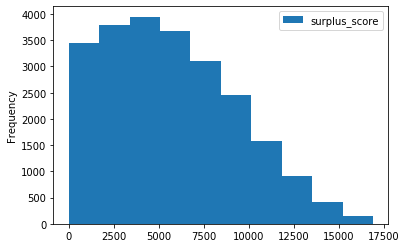

In [116]:
surplus[['surplus_score']].plot.hist()

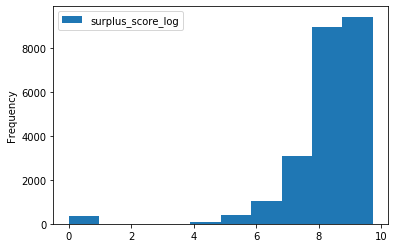

In [117]:
surplus[['surplus_score_log']].plot.hist()

In [118]:
surplus = surplus[['ID', 'surplus_score', 'Indok']]

In [119]:
years_gender_surplus = years_and_gender.merge(surplus, on='ID', how='outer')

In [120]:
years_gender_surplus.head()

,ID,nem,hallg_ID,erettsegi_ota_eltelt_évek,surplus_score,Indok
0,H1140690795N-A82011/12/1,Férfi,H114069079,NaN,NaN,NaN
1,H1140690795N-A82012/13/1,Férfi,H114069079,NaN,NaN,NaN
2,H1140691057N-ANG052010/11/1,Férfi,H114069105,NaN,NaN,NaN
3,H1140691057N-ANG052011/12/1,Férfi,H114069105,NaN,NaN,NaN
4,H1140691331N-AEM2011/12/1,Férfi,H114069133,NaN,NaN,NaN


In [121]:
years_gender_surplus.isna().sum()

ID                               0
nem                           4086
hallg_ID                      4086
erettsegi_ota_eltelt_évek    19048
surplus_score                13406
Indok                        13406
dtype: int64

In [122]:
len(years_gender_surplus)

36859

In [123]:
writer = pd.ExcelWriter('./data/clean/evek_nem.xlsx')
years_gender_surplus.to_excel(writer,'Sheet1')
writer.save()

### Nyelvvizsga 
### Language exam

In [124]:
language_exam = pd.read_excel("./data/Gólya, Középsuli, személyes/Gólya Pontszám Nyelvvizsga 20190218-KÓDOLT.XLSX")

In [125]:
language_exam.columns

Index(['Hallgató_ID', 'Neptun Képzés', 'Neptun Felvétel féléve', 'Pontszám',
       'Pontszám típusa', 'Fokozat', 'Kétnyelvű (Gólya)', 'Kiadás dátuma',
       'Közhiteles forrás', 'Nyelv (Gólya)', 'Szakmai (Gólya)', 'Vizsgatípus',
       'Fájl neve', 'Szakmai (Neptun)', 'Szakmai nyelvvizsga típusa',
       'Nyelvvizsga típusa', 'Nyelvvizsga foka', 'Nyelv (Neptun)',
       'Nyelvvizsga dátuma', 'Nyelvtudás típusa', 'Kétnyelvű (Neptun)',
       'Honosított', 'Honosított nyvizsga dátuma', 'Honosított nyvizsga száma',
       'Honosítás -tól', 'Honosítás -ig', 'Felmentve', 'Ellenőrizve',
       'Kiállítás dátuma'],
      dtype='object')

In [126]:
language_exam['ID'] = language_exam.Hallgató_ID + language_exam['Neptun Képzés'] + language_exam['Neptun Felvétel féléve']

In [127]:
language_exam['pont'] = language_exam['Vizsgatípus'].apply(lambda x: 1 if x=='C' else 0.5)

In [128]:
language_exam['szint'] = language_exam['Fokozat'].apply(lambda x: 1.5 if x=='felső' else 1)

In [129]:
language_exam['nyv_pontok'] = language_exam.pont * language_exam.szint

In [130]:
language_exam[['ID', 'Fokozat', 'szint', 'Vizsgatípus', 'pont', 'nyv_pontok']].head()

,ID,Fokozat,szint,Vizsgatípus,pont,nyv_pontok
0,H4571563701N-AEM2013/14/1,közép,1.0,B,0.5,0.5
1,H4571563701N-AEM2013/14/1,közép,1.0,A,0.5,0.5
2,H4571564581N-AEM2013/14/1,közép,1.0,A,0.5,0.5
3,H4571564581N-AEM2013/14/1,közép,1.0,B,0.5,0.5
4,H4571567821N-AEM2013/14/1,felső,1.5,C,1.0,1.5


In [131]:
language_exam = language_exam[['ID', 'nyv_pontok']]

In [132]:
language_exam_clean = language_exam.groupby('ID').sum().reset_index()

In [133]:
writer = pd.ExcelWriter('./data/clean/nyv_clean.xlsx')
language_exam_clean.to_excel(writer,'Sheet1')
writer.save()

### Verseny
### Competition

In [134]:
competition = pd.read_excel("./data/Gólya, Középsuli, személyes/Gólya Többletpont 20190218-KÓDOLT.XLSX")

In [135]:
competition['Rövid leírás'].unique()

array([nan,
       'Országos Képzési Jegyzékben szereplő emelt szintű v. felsőfokú, szakiránynak megfelelő szakképesítés',
       'SZÉTV-n elért 1-30., szakiránynak megfelelő helyezés',
       'Országos bajnokság (1-3. helyezés)',
       'OSZTV-n elért, szakiránynak megfelelő helyezés',
       'Nemzetközi eredmény (1-3. helyezés)',
       'OKTV-n elért 1-30., szakiránynak megfelelő helyezés',
       'Diákolimpia országos döntő (1-3. helyezés)',
       'Országos Művészeti Tanulmányi Versenyen elért legalább 3. helyezés',
       'Felsőfokú oklevél minősítése',
       'Világ- és Európa-bajnokság (1-3. helyezés)',
       'Országos Ifjúsági Tudományos Innovációs Versenyen elért legalább 3. helyezés',
       'Középiskolai Tudományos Diákkörök Országos Konferenciáján elért helyezés: első díjas',
       'Középiskolai Tudományos Diákkörök Országos Konferenciáján elért helyezés: nagydíjas',
       'Ifjúsági Tudományos és Innovációs Tehetségkutató Versenyen elért legalább 3. helyezés',
       'sz

In [136]:
competitions=['SZÉTV-n elért 1-30., szakiránynak megfelelő helyezés', 
     'OSZTV-n elért, szakiránynak megfelelő helyezés', 
     'OKTV-n elért 1-30., szakiránynak megfelelő helyezés',
     'Országos Ifjúsági Tudományos Innovációs Versenyen elért legalább 3. helyezés',
     'Középiskolai Tudományos Diákkörök Országos Konferenciáján elért helyezés: első díjas',
     'Középiskolai Tudományos Diákkörök Országos Konferenciáján elért helyezés: nagydíjas',
     'Ifjúsági Tudományos és Innovációs Tehetségkutató Versenyen elért legalább 3. helyezés',
     'szakiránynak megfelelő OSZTV']

In [137]:
competition.replace(competitions, 'tud_verseny', inplace=True)

In [138]:
competition = competition[competition['Rövid leírás'] == 'tud_verseny']

In [139]:
competition['ID'] = competition.Hallgató_ID + competition['Neptun Képzés'] + competition['Neptun Felvétel féléve']

In [140]:
competition = competition[['ID', 'Rövid leírás']]
competition.head()

,ID,Rövid leírás
44,H4571590911N-AEM2013/14/1,tud_verseny
77,H4571752521N-AEM2013/14/1,tud_verseny
88,H768550541N-AEM2013/14/1,tud_verseny
129,H4571637051N-AEM2013/14/1,tud_verseny
137,H4571642171N-AEM2013/14/1,tud_verseny


In [141]:
len(competition)

1323

In [142]:
Counter(competition.duplicated('ID'))

Counter({False: 1059, True: 264})

In [143]:
competition.drop_duplicates(subset=['ID'], inplace=True)

In [144]:
writer = pd.ExcelWriter('./data/clean/tud_verseny.xlsx')
competition.to_excel(writer,'Sheet1')
writer.save()

### **Középiskola települése**
### Place of secondary school 

In [145]:
secschool_place = pd.read_excel("./data/Gólya, Középsuli, személyes/2010-től felvett KözépSuli_Hallgatóhoz_SQL-KÓDOLT-20190216.XLSX")

In [146]:
secschool_place['ID'] = secschool_place.Hallgató_ID + secschool_place['Képzés'] + secschool_place['Felvétel féléve']

In [147]:
secschool_place = secschool_place[~secschool_place['Képzettség típusa'].isin(['Egyetem', 'Főiskola'])]

In [148]:
secschool_place['Képzettség típusa'].unique()

array(['Gimnázium', 'Szakközépiskola',
       'Külföldi rendszerű, Magyarországon működő iskola',
       'Egyéb középiskola', 'Külföldön működő iskola',
       'Idegennyelvű (kéttannyelvű) középiskola', 'Technikum',
       'Nincs megadva', 'Dolgozók középiskolája', 'Szakgimnázium'],
      dtype=object)

In [149]:
drop_duplicatesks_place = secschool_place[['ID', 'Ország', 'Megye', 'Város']]

In [150]:
city_w_county_rights = ['Békéscsaba', 'Debrecen', 'Dunaújváros', 'Eger', 'Érd', 'Győr', 'Hódmezővásárhely', 'Kaposvár', 
               'Kecskemét', 'Miskolc', 'Nagykanizsa', 'Nyíregyháza', 'Pécs', 'Salgótarján', 'Sopron', 'Szeged', 
               'Székesfehérvár', 'Szekszárd', 'Szolnok', 'Szombathely', 'Tatabánya', 'Veszprém', 'Zalaegerszeg']

In [151]:
secschool_place['place_of_hs'] = secschool_place.apply(lambda row: 'capital_city' if row['Megye'] == 'Budapest' else 
                                      ('city_w_county_rights' if row['Város'] in city_w_county_rights else 
                                       ('town' if (row.Ország == 'Magyarország' and not isNaN(row.Város)) else 
                                        ('foreign' if (not isNaN(row.Ország) and row.Ország !='Magyarország')else np.nan))),axis=1)

In [152]:
secschool_place.head(13)

,Kar neve,Hallgató_ID,Képzés,Képzési szint,Képzési terület,Felvétel féléve,Státusz,Képzés jogviszony kezdete,Jogviszony keletkezés oka,Képzés jogviszony vége,...,Szervezet kódja,Szervezet neve,Szervezet típusa,Szervezet OM azonosítója,Archívált,Ország,Megye,Város,ID,place_of_hs
0,Villamosmérnöki és Informatikai Kar,H114069079,5N-A8,alapképzés (BA/BSc),informatika,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2012-08-24,...,SZT. -38597813,"SZTE Ságvári Endre Gyakorló Gimnázium, Szeged",Középiskola,029742,Hamis,Magyarország,Csongrád,Szeged,H1140690795N-A82011/12/1,city_w_county_rights
1,Villamosmérnöki és Informatikai Kar,H114069079,5N-A8,alapképzés (BA/BSc),informatika,2012/13/1,Aktív,2012-09-01 00:00:00,Felvétel,NaT,...,SZT. -38597813,"SZTE Ságvári Endre Gyakorló Gimnázium, Szeged",Középiskola,029742,Hamis,Magyarország,Csongrád,Szeged,H1140690795N-A82012/13/1,city_w_county_rights
2,Gazdaság- és Társadalomtudományi Kar,H114069105,7N-ANG05,alapképzés (BA/BSc),gazdaságtudományok,2010/11/1,Elbocsátott,2010-09-01 09:44:19,Felvétel,2011-08-31,...,Czu. -38598157,Czuczor Gergely Bencés Gimnázium...,Középiskola,030698,Hamis,Magyarország,Győr-Moson-Sopron,Győr,H1140691057N-ANG052010/11/1,city_w_county_rights
3,Gazdaság- és Társadalomtudományi Kar,H114069105,7N-ANG05,alapképzés (BA/BSc),gazdaságtudományok,2011/12/1,Diplomát szerzett,2011-09-01 00:00:00,Felvétel,2013-06-28,...,Czu. -38598157,Czuczor Gergely Bencés Gimnázium...,Középiskola,030698,Hamis,Magyarország,Győr-Moson-Sopron,Győr,H1140691057N-ANG052011/12/1,city_w_county_rights
4,Építőmérnöki Kar,H114069133,1N-AEM,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2012-08-24,...,029740,Kossuth Zsuzsanna Műszaki Szakközépiskola és G...,Középiskola,029740,Hamis,Magyarország,Csongrád,Hódmezővásárhely,H1140691331N-AEM2011/12/1,city_w_county_rights
5,Gépészmérnöki Kar,H114069145,2N-AG0,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2012-08-24,...,030722,Baross Gábor Közgazdasági Szakközépiskola,Középiskola,030722,Hamis,Magyarország,Győr-Moson-Sopron,Győr,H1140691452N-AG02011/12/1,city_w_county_rights
6,Közlekedésmérnöki és Járműmérnöki Kar,H114069145,6N-AJ,alapképzés (BA/BSc),műszaki,2010/11/1,Elbocsátott,2010-09-01 00:00:00,Felvétel,2011-01-27,...,030722,Baross Gábor Közgazdasági Szakközépiskola,Középiskola,030722,Hamis,Magyarország,Győr-Moson-Sopron,Győr,H1140691456N-AJ2010/11/1,city_w_county_rights
7,Gazdaság- és Társadalomtudományi Kar,H114069185,7N-AGM02,alapképzés (BA/BSc),gazdaságtudományok,2011/12/1,Elbocsátott,2011-09-01 00:00:00,Felvétel,2012-08-24,...,Józ. -38597351,"József Attila Gimnázium és Általános Iskola , ...",Középiskola,034982,Hamis,Magyarország,Budapest,Budapest,H1140691857N-AGM022011/12/1,capital_city
8,Gazdaság- és Társadalomtudományi Kar,H114069185,7N-AGM02,alapképzés (BA/BSc),gazdaságtudományok,2010/11/1,Elbocsátott,2010-09-01 00:00:00,Felvétel,2011-08-26,...,Józ. -38597351,"József Attila Gimnázium és Általános Iskola , ...",Középiskola,034982,Hamis,Magyarország,Budapest,Budapest,H1140691857N-AGM022010/11/1,capital_city
9,Vegyészmérnöki és Biomérnöki Kar,H114069185,4N-A7,alapképzés (BA/BSc),műszaki,2013/14/1,Elbocsátott,2013-09-01 00:00:00,Felvétel,2015-09-07,...,Józ. -38597351,"József Attila Gimnázium és Általános Iskola , ...",Középiskola,034982,Hamis,Magyarország,Budapest,Budapest,H1140691854N-A72013/14/1,capital_city


In [153]:
secschool_place[secschool_place.Ország != 'Magyarország'].head(6)

,Kar neve,Hallgató_ID,Képzés,Képzési szint,Képzési terület,Felvétel féléve,Státusz,Képzés jogviszony kezdete,Jogviszony keletkezés oka,Képzés jogviszony vége,...,Szervezet kódja,Szervezet neve,Szervezet típusa,Szervezet OM azonosítója,Archívált,Ország,Megye,Város,ID,place_of_hs
150,Vegyészmérnöki és Biomérnöki Kar,H114082111,4N-A7,alapképzés (BA/BSc),műszaki,2017/18/1,Elbocsátott,2017-09-01,Felvétel,2019-02-03,...,KULF058,Munkácsi Informatika És Idegen Nyelv Tagozatos...,Középiskola,NaN,Hamis,Ukrajna,NaN,Munkács,H1140821114N-A72017/18/1,foreign
219,Villamosmérnöki és Informatikai Kar,H114089672,5N-A8,alapképzés (BA/BSc),informatika,2010/11/1,Elbocsátott,2010-09-01,Felvétel,2011-06-17,...,Széchenyi _2849463,"Széchenyi István Szakközépiskola És Gimnázium,...",Középiskola,NaN,Hamis,NaN,NaN,NaN,H1140896725N-A82010/11/1,NaN
547,Villamosmérnöki és Informatikai Kar,H143976878,5N-A8,alapképzés (BA/BSc),informatika,2010/11/1,Elbocsátott,2010-09-01,Felvétel,2015-08-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H1439768785N-A82010/11/1,NaN
550,Közlekedésmérnöki és Járműmérnöki Kar,H154790805,6N-AL,alapképzés (BA/BSc),műszaki,2016/17/1,Aktív,2016-09-01,Felvétel,NaT,...,IBO,International Baccalaureate Organization,Középiskola,NaN,Hamis,Svájc,NaN,Genf,H1547908056N-AL2016/17/1,foreign
694,Gépészmérnöki Kar,H157219371,2N-AG0,alapképzés (BA/BSc),műszaki,2015/16/1,Abszolvált,2015-09-01,Felvétel,2017-06-30,...,1. Sz. Ipa_2843457,"1. Sz. Ipari Szakközépiskola, Székelyudvarhely",Középiskola,NaN,Hamis,Románia,NaN,NaN,H1572193712N-AG02015/16/1,foreign
708,Villamosmérnöki és Informatikai Kar,H157220216,5N-A8,alapképzés (BA/BSc),informatika,2012/13/1,Diplomát szerzett,2012-09-01,Felvétel,2015-07-03,...,KULF075,Ady Endre Elméleti Líceum,Középiskola,NaN,Hamis,Románia,NaN,Nagyvárad,H1572202165N-A82012/13/1,foreign


In [154]:
Counter(secschool_place.duplicated('ID'))

Counter({False: 35038, True: 1318})

In [155]:
secschool_place[secschool_place.duplicated('ID', False)]

,Kar neve,Hallgató_ID,Képzés,Képzési szint,Képzési terület,Felvétel féléve,Státusz,Képzés jogviszony kezdete,Jogviszony keletkezés oka,Képzés jogviszony vége,...,Szervezet kódja,Szervezet neve,Szervezet típusa,Szervezet OM azonosítója,Archívált,Ország,Megye,Város,ID,place_of_hs
80,Villamosmérnöki és Informatikai Kar,H114073636,5N-A7,alapképzés (BA/BSc),műszaki,2010/11/1,Diplomát szerzett,2010-09-01,Felvétel,2015-07-03,...,58759H,"Piarista Gimnázium, Budapest",Középiskola,035259,Hamis,Magyarország,Budapest,Budapest V. kerület,H1140736365N-A72010/11/1,capital_city
81,Villamosmérnöki és Informatikai Kar,H114073636,5N-A7,alapképzés (BA/BSc),műszaki,2010/11/1,Diplomát szerzett,2010-09-01,Felvétel,2015-07-03,...,58759H,"Piarista Gimnázium, Budapest",Középiskola,035259,Hamis,Magyarország,Budapest,Budapest,H1140736365N-A72010/11/1,capital_city
243,Közlekedésmérnöki és Járműmérnöki Kar,H114092694,6N-A0,alapképzés (BA/BSc),műszaki,2010/11/1,Elbocsátott,2010-09-01,Felvétel,2011-08-26,...,58759H,"Piarista Gimnázium, Budapest",Középiskola,035259,Hamis,Magyarország,Budapest,Budapest V. kerület,H1140926946N-A02010/11/1,capital_city
244,Közlekedésmérnöki és Járműmérnöki Kar,H114092694,6N-A0,alapképzés (BA/BSc),műszaki,2011/12/1,Elbocsátott,2011-09-01,Felvétel,2014-05-30,...,58759H,"Piarista Gimnázium, Budapest",Középiskola,035259,Hamis,Magyarország,Budapest,Budapest,H1140926946N-A02011/12/1,capital_city
245,Közlekedésmérnöki és Járműmérnöki Kar,H114092694,6N-A0,alapképzés (BA/BSc),műszaki,2010/11/1,Elbocsátott,2010-09-01,Felvétel,2011-08-26,...,58759H,"Piarista Gimnázium, Budapest",Középiskola,035259,Hamis,Magyarország,Budapest,Budapest,H1140926946N-A02010/11/1,capital_city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44706,Gazdaság- és Társadalomtudományi Kar,H793142580,7N-AGM02,alapképzés (BA/BSc),gazdaságtudományok,2018/19/1,Aktív,2018-09-01,Felvétel,NaT,...,203040,203040 Karcagi Szakképzési Centrum,Partnerszervezet,203040,Igaz,Magyarország,NaN,NaN,H7931425807N-AGM022018/19/1,NaN
44720,Gazdaság- és Társadalomtudományi Kar,H793143055,7N-AKM03,alapképzés (BA/BSc),társadalomtudomány,2018/19/1,Passzív,2018-09-01,Felvétel,NaT,...,196004,196004 BETHLEN GÁBOR ÁLTALÁNOS ISKOLA ÉS ÚJREÁ...,Telephely,035328,Hamis,Magyarország,Budapest,Budapest,H7931430557N-AKM032018/19/1,capital_city
44721,Gazdaság- és Társadalomtudományi Kar,H793143055,7N-AKM03,alapképzés (BA/BSc),társadalomtudomány,2018/19/1,Passzív,2018-09-01,Felvétel,NaT,...,196004,196004 BETHLEN GÁBOR ÁLTALÁNOS ISKOLA ÉS ÚJREÁ...,Telephely,035328,Hamis,Magyarország,Budapest,Budapest V. kerület,H7931430557N-AKM032018/19/1,capital_city
44726,Gazdaság- és Társadalomtudományi Kar,H793143203,7N-AGM02,alapképzés (BA/BSc),gazdaságtudományok,2018/19/1,Törölt,NaT,Felvétel,NaT,...,193002,193002 BUDAPESTI FAZEKAS MIHÁLY ÁLTALÁNOS ISKO...,Telephely,035277,Hamis,Magyarország,Budapest,Budapest VIII. kerület,H7931432037N-AGM022018/19/1,capital_city


In [156]:
secschool_place.drop_duplicates('ID', inplace=True)

In [157]:
secschool_place = secschool_place[['ID', 'place_of_hs']]

In [158]:
writer = pd.ExcelWriter('./data/clean/ks_helye.xlsx')
secschool_place.to_excel(writer,'Sheet1')
writer.save()

# all together 

In [159]:
entrance_status_clean.head()

,Unnamed: 0,ID,Hallgató_ID,Szervezet_neve,Képzés,Felvétel_féléve,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Státusz,Oklevél_eredménye_számmal,Felvételkori_pénzü_státusz,re_enrolled
0,0,H1140690795N-A82011/12/1,H114069079,Villamosmérnöki és Informatikai Kar,5N-A8,2011/12/1,417.00,150.0,166.0,85.00,Elbocsátott,NaN,Államilag támogatott,False
1,1,H1140690795N-A82012/13/1,H114069079,Villamosmérnöki és Informatikai Kar,5N-A8,2012/13/1,410.00,148.0,166.0,78.00,Végzett,3.55,Államilag támogatott,True
2,2,H1140691057N-ANG052010/11/1,H114069105,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2010/11/1,467.75,170.0,187.0,93.75,Elbocsátott,NaN,Önköltséges,False
3,3,H1140691057N-ANG052011/12/1,H114069105,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2011/12/1,459.00,170.0,187.0,85.00,Végzett,3.62,Államilag támogatott,True
4,4,H1140691331N-AEM2011/12/1,H114069133,Építőmérnöki Kar,1N-AEM,2011/12/1,387.00,0.0,176.0,35.00,Elbocsátott,NaN,Államilag támogatott,False


In [160]:
pivoted_matura.head()

,ID,Hallgató_ID,idegen_nyelv,magyar nyelv és irodalom,matematika,történelem,választott_tárgy
0,H1140689996N-A02013/14/1,H114068999,150.0,84.0,89.0,84.0,74.0
1,H1140691854N-A72013/14/1,H114069185,150.0,60.0,78.0,97.5,83.0
2,H1140697657N-AGM022018/19/1,H114069765,82.5,67.0,91.0,87.0,77.0
3,H1140698055N-A82013/14/1,H114069805,74.0,48.0,92.0,81.0,135.0
4,H1140705137N-AKM032016/17/1,H114070513,83.0,68.0,81.0,88.0,82.0


#### **státusz + érettségi** 

In [161]:
data_all = entrance_status_clean.merge(pivoted_matura, on='ID', how = 'left')

In [162]:
len(data_all)

24062

In [163]:
data_all.isna().sum()

Unnamed: 0                        0
ID                                0
Hallgató_ID_x                     0
Szervezet_neve                    0
Képzés                            0
Felvétel_féléve                   0
felvi_osszes_skalazott          526
Hozott/Tanulmányi_pontszám      527
Szerzett/Érettségi_pontsz       527
tobblet_skalazott               527
Státusz                           0
Oklevél_eredménye_számmal     10896
Felvételkori_pénzü_státusz        0
re_enrolled                       0
Hallgató_ID_y                 16124
idegen_nyelv                  16256
magyar nyelv és irodalom      16201
matematika                    16151
történelem                    16201
választott_tárgy              16167
dtype: int64

In [164]:
data_all_clean = data_all.dropna(thresh=8)

In [165]:
data_all_clean.isna().sum()

Unnamed: 0                        0
ID                                0
Hallgató_ID_x                     0
Szervezet_neve                    0
Képzés                            0
Felvétel_féléve                   0
felvi_osszes_skalazott          526
Hozott/Tanulmányi_pontszám      527
Szerzett/Érettségi_pontsz       527
tobblet_skalazott               527
Státusz                           0
Oklevél_eredménye_számmal     10896
Felvételkori_pénzü_státusz        0
re_enrolled                       0
Hallgató_ID_y                 16124
idegen_nyelv                  16256
magyar nyelv és irodalom      16201
matematika                    16151
történelem                    16201
választott_tárgy              16167
dtype: int64

In [166]:
Counter(data_all_clean.Státusz)

Counter({'Elbocsátott': 10641, 'Végzett': 13421})

In [167]:
Counter(data_all_clean.Hallgató_ID_x != data_all_clean.Hallgató_ID_y)

Counter({True: 16124, False: 7938})

In [168]:
data_all_clean['Hallgató_ID'] = data_all_clean['Hallgató_ID_x']
data_all_clean.drop(columns=['Hallgató_ID_x', 'Hallgató_ID_y'], inplace=True)

In [169]:
data_all_clean.head()

,Unnamed: 0,ID,Szervezet_neve,Képzés,Felvétel_féléve,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Státusz,Oklevél_eredménye_számmal,Felvételkori_pénzü_státusz,re_enrolled,idegen_nyelv,magyar nyelv és irodalom,matematika,történelem,választott_tárgy,Hallgató_ID
0,0,H1140690795N-A82011/12/1,Villamosmérnöki és Informatikai Kar,5N-A8,2011/12/1,417.00,150.0,166.0,85.00,Elbocsátott,NaN,Államilag támogatott,False,NaN,NaN,NaN,NaN,NaN,H114069079
1,1,H1140690795N-A82012/13/1,Villamosmérnöki és Informatikai Kar,5N-A8,2012/13/1,410.00,148.0,166.0,78.00,Végzett,3.55,Államilag támogatott,True,NaN,NaN,NaN,NaN,NaN,H114069079
2,2,H1140691057N-ANG052010/11/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2010/11/1,467.75,170.0,187.0,93.75,Elbocsátott,NaN,Önköltséges,False,NaN,NaN,NaN,NaN,NaN,H114069105
3,3,H1140691057N-ANG052011/12/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2011/12/1,459.00,170.0,187.0,85.00,Végzett,3.62,Államilag támogatott,True,NaN,NaN,NaN,NaN,NaN,H114069105
4,4,H1140691331N-AEM2011/12/1,Építőmérnöki Kar,1N-AEM,2011/12/1,387.00,0.0,176.0,35.00,Elbocsátott,NaN,Államilag támogatott,False,NaN,NaN,NaN,NaN,NaN,H114069133


In [170]:
len(data_all_clean)

24062

In [171]:
data_all_clean.drop('Unnamed: 0', axis=1, inplace=True)

In [172]:
data_all_clean.columns

Index(['ID', 'Szervezet_neve', 'Képzés', 'Felvétel_féléve',
       'felvi_osszes_skalazott', 'Hozott/Tanulmányi_pontszám',
       'Szerzett/Érettségi_pontsz', 'tobblet_skalazott', 'Státusz',
       'Oklevél_eredménye_számmal', 'Felvételkori_pénzü_státusz',
       're_enrolled', 'idegen_nyelv', 'magyar nyelv és irodalom', 'matematika',
       'történelem', 'választott_tárgy', 'Hallgató_ID'],
      dtype='object')

#### **+ középsuli jegyek** 

In [173]:
data_all_clean = data_all_clean.merge(pivoted_secondary_school_results.drop(columns=['Hallgató_ID']), on='ID', how='left')

In [174]:
data_all_clean.columns

Index(['ID', 'Szervezet_neve', 'Képzés', 'Felvétel_féléve',
       'felvi_osszes_skalazott', 'Hozott/Tanulmányi_pontszám',
       'Szerzett/Érettségi_pontsz', 'tobblet_skalazott', 'Státusz',
       'Oklevél_eredménye_számmal', 'Felvételkori_pénzü_státusz',
       're_enrolled', 'idegen_nyelv', 'magyar nyelv és irodalom', 'matematika',
       'történelem', 'választott_tárgy', 'Hallgató_ID', 'idegen_nyelv_ks',
       'magyar_irodalom_ks', 'magyar_nyelvtan_ks', 'matematika_ks',
       'történelem_ks', 'választható_tantárgy_ks'],
      dtype='object')

In [175]:
data_all_clean.isna().sum()

ID                                0
Szervezet_neve                    0
Képzés                            0
Felvétel_féléve                   0
felvi_osszes_skalazott          526
Hozott/Tanulmányi_pontszám      527
Szerzett/Érettségi_pontsz       527
tobblet_skalazott               527
Státusz                           0
Oklevél_eredménye_számmal     10896
Felvételkori_pénzü_státusz        0
re_enrolled                       0
idegen_nyelv                  16256
magyar nyelv és irodalom      16201
matematika                    16151
történelem                    16201
választott_tárgy              16167
Hallgató_ID                       0
idegen_nyelv_ks               12826
magyar_irodalom_ks            12814
magyar_nyelvtan_ks            12814
matematika_ks                 12814
történelem_ks                 12814
választható_tantárgy_ks       12913
dtype: int64

#### **+ nyv adatok**

In [176]:
data_all_clean = data_all_clean.merge(language_exam_clean, on='ID', how='left')

In [177]:
data_all_clean.head()

,ID,Szervezet_neve,Képzés,Felvétel_féléve,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Státusz,Oklevél_eredménye_számmal,...,történelem,választott_tárgy,Hallgató_ID,idegen_nyelv_ks,magyar_irodalom_ks,magyar_nyelvtan_ks,matematika_ks,történelem_ks,választható_tantárgy_ks,nyv_pontok
0,H1140690795N-A82011/12/1,Villamosmérnöki és Informatikai Kar,5N-A8,2011/12/1,417.00,150.0,166.0,85.00,Elbocsátott,NaN,...,NaN,NaN,H114069079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,H1140690795N-A82012/13/1,Villamosmérnöki és Informatikai Kar,5N-A8,2012/13/1,410.00,148.0,166.0,78.00,Végzett,3.55,...,NaN,NaN,H114069079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1140691057N-ANG052010/11/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2010/11/1,467.75,170.0,187.0,93.75,Elbocsátott,NaN,...,NaN,NaN,H114069105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1140691057N-ANG052011/12/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2011/12/1,459.00,170.0,187.0,85.00,Végzett,3.62,...,NaN,NaN,H114069105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H1140691331N-AEM2011/12/1,Építőmérnöki Kar,1N-AEM,2011/12/1,387.00,0.0,176.0,35.00,Elbocsátott,NaN,...,NaN,NaN,H114069133,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **+ személyes adatok (evek, nem, ks helye)**

In [178]:
Counter(years_gender_surplus.duplicated())

Counter({False: 36859})

In [179]:
years_gender_surplus.head()

,ID,nem,hallg_ID,erettsegi_ota_eltelt_évek,surplus_score,Indok
0,H1140690795N-A82011/12/1,Férfi,H114069079,NaN,NaN,NaN
1,H1140690795N-A82012/13/1,Férfi,H114069079,NaN,NaN,NaN
2,H1140691057N-ANG052010/11/1,Férfi,H114069105,NaN,NaN,NaN
3,H1140691057N-ANG052011/12/1,Férfi,H114069105,NaN,NaN,NaN
4,H1140691331N-AEM2011/12/1,Férfi,H114069133,NaN,NaN,NaN


In [180]:
data_all_clean = data_all_clean.merge(years_gender_surplus[['ID', 'nem', 'erettsegi_ota_eltelt_évek', 'surplus_score', 'Indok']], on='ID', how='left')

In [181]:
data_all_clean.head()

,ID,Szervezet_neve,Képzés,Felvétel_féléve,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Státusz,Oklevél_eredménye_számmal,...,magyar_irodalom_ks,magyar_nyelvtan_ks,matematika_ks,történelem_ks,választható_tantárgy_ks,nyv_pontok,nem,erettsegi_ota_eltelt_évek,surplus_score,Indok
0,H1140690795N-A82011/12/1,Villamosmérnöki és Informatikai Kar,5N-A8,2011/12/1,417.00,150.0,166.0,85.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN
1,H1140690795N-A82012/13/1,Villamosmérnöki és Informatikai Kar,5N-A8,2012/13/1,410.00,148.0,166.0,78.00,Végzett,3.55,...,NaN,NaN,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN
2,H1140691057N-ANG052010/11/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2010/11/1,467.75,170.0,187.0,93.75,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN
3,H1140691057N-ANG052011/12/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2011/12/1,459.00,170.0,187.0,85.00,Végzett,3.62,...,NaN,NaN,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN
4,H1140691331N-AEM2011/12/1,Építőmérnöki Kar,1N-AEM,2011/12/1,387.00,0.0,176.0,35.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN


In [182]:
data_all_clean = data_all_clean.merge(secschool_place, on='ID', how='left')

In [183]:
len(data_all_clean)

24062

####  **Verseny eredmény**

In [184]:
competition.head()

,ID,Rövid leírás
44,H4571590911N-AEM2013/14/1,tud_verseny
77,H4571752521N-AEM2013/14/1,tud_verseny
88,H768550541N-AEM2013/14/1,tud_verseny
129,H4571637051N-AEM2013/14/1,tud_verseny
137,H4571642171N-AEM2013/14/1,tud_verseny


In [185]:
competition.columns = ['ID', 'verseny']

In [186]:
competition.replace('tud_verseny', True, inplace=True)

In [187]:
competition.head()

,ID,verseny
44,H4571590911N-AEM2013/14/1,True
77,H4571752521N-AEM2013/14/1,True
88,H768550541N-AEM2013/14/1,True
129,H4571637051N-AEM2013/14/1,True
137,H4571642171N-AEM2013/14/1,True


In [188]:
data_all_clean = data_all_clean.merge(competition, on='ID', how='left')

In [189]:
data_all_clean.isna().sum()

ID                                0
Szervezet_neve                    0
Képzés                            0
Felvétel_féléve                   0
felvi_osszes_skalazott          526
Hozott/Tanulmányi_pontszám      527
Szerzett/Érettségi_pontsz       527
tobblet_skalazott               527
Státusz                           0
Oklevél_eredménye_számmal     10896
Felvételkori_pénzü_státusz        0
re_enrolled                       0
idegen_nyelv                  16256
magyar nyelv és irodalom      16201
matematika                    16151
történelem                    16201
választott_tárgy              16167
Hallgató_ID                       0
idegen_nyelv_ks               12826
magyar_irodalom_ks            12814
magyar_nyelvtan_ks            12814
matematika_ks                 12814
történelem_ks                 12814
választható_tantárgy_ks       12913
nyv_pontok                    14593
nem                             445
erettsegi_ota_eltelt_évek     16013
surplus_score               

In [190]:
len(data_all_clean)

24062

In [191]:
data_all_clean.columns

Index(['ID', 'Szervezet_neve', 'Képzés', 'Felvétel_féléve',
       'felvi_osszes_skalazott', 'Hozott/Tanulmányi_pontszám',
       'Szerzett/Érettségi_pontsz', 'tobblet_skalazott', 'Státusz',
       'Oklevél_eredménye_számmal', 'Felvételkori_pénzü_státusz',
       're_enrolled', 'idegen_nyelv', 'magyar nyelv és irodalom', 'matematika',
       'történelem', 'választott_tárgy', 'Hallgató_ID', 'idegen_nyelv_ks',
       'magyar_irodalom_ks', 'magyar_nyelvtan_ks', 'matematika_ks',
       'történelem_ks', 'választható_tantárgy_ks', 'nyv_pontok', 'nem',
       'erettsegi_ota_eltelt_évek', 'surplus_score', 'Indok', 'place_of_hs',
       'verseny'],
      dtype='object')

In [192]:
# data_all_clean.rename(index=str, columns={"Státusz": "Statusz_vegzett", "Felvételkori_pénzü_státusz": "allamilag_tamogatott", "nem":"nem_ferfi"}, inplace=True)

In [193]:
# data_all_clean.replace('Végzett', True, inplace=True)

In [194]:
# data_all_clean.replace('Elbocsátott', False, inplace=True)

In [195]:
# data_all_clean.replace('Önköltséges', False, inplace=True)

In [196]:
# data_all_clean.replace('Államilag támogatott', True, inplace=True)

In [197]:
# data_all_clean.replace('Férfi', True, inplace=True)

In [198]:
# data_all_clean.replace('Nő', False, inplace=True)

In [199]:
data_all_clean.head(10)

,ID,Szervezet_neve,Képzés,Felvétel_féléve,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Státusz,Oklevél_eredménye_számmal,...,matematika_ks,történelem_ks,választható_tantárgy_ks,nyv_pontok,nem,erettsegi_ota_eltelt_évek,surplus_score,Indok,place_of_hs,verseny
0,H1140690795N-A82011/12/1,Villamosmérnöki és Informatikai Kar,5N-A8,2011/12/1,417.00,150.0,166.0,85.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,city_w_county_rights,NaN
1,H1140690795N-A82012/13/1,Villamosmérnöki és Informatikai Kar,5N-A8,2012/13/1,410.00,148.0,166.0,78.00,Végzett,3.55,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,city_w_county_rights,NaN
2,H1140691057N-ANG052010/11/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2010/11/1,467.75,170.0,187.0,93.75,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,city_w_county_rights,NaN
3,H1140691057N-ANG052011/12/1,Gazdaság- és Társadalomtudományi Kar,7N-ANG05,2011/12/1,459.00,170.0,187.0,85.00,Végzett,3.62,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,city_w_county_rights,NaN
4,H1140691331N-AEM2011/12/1,Építőmérnöki Kar,1N-AEM,2011/12/1,387.00,0.0,176.0,35.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,city_w_county_rights,NaN
5,H1140691456N-AJ2010/11/1,Közlekedésmérnöki és Járműmérnöki Kar,6N-AJ,2010/11/1,409.75,133.0,158.0,93.75,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,city_w_county_rights,NaN
6,H1140691452N-AG02011/12/1,Gépészmérnöki Kar,2N-AG0,2011/12/1,401.00,143.0,158.0,85.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,city_w_county_rights,NaN
7,H1140691857N-AGM022010/11/1,Gazdaság- és Társadalomtudományi Kar,7N-AGM02,2010/11/1,430.00,0.0,165.0,100.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,capital_city,NaN
8,H1140691857N-AGM022011/12/1,Gazdaság- és Társadalomtudományi Kar,7N-AGM02,2011/12/1,430.00,0.0,165.0,100.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,capital_city,NaN
9,H1140691857N-AGM022012/13/1,Gazdaság- és Társadalomtudományi Kar,7N-AGM02,2012/13/1,430.00,0.0,165.0,100.00,Elbocsátott,NaN,...,NaN,NaN,NaN,NaN,Férfi,NaN,NaN,NaN,capital_city,NaN


In [200]:
data_all_clean.Képzés.unique()

array(['5N-A8', '7N-ANG05', '1N-AEM', '6N-AJ', '2N-AG0', '7N-AGM02',
       '4N-A7', '6N-A0', '5N-A7', '7N-AMM04', '7N-AKM03', '2N-AT0',
       '9N-AM06', '9N-AF06', '4N-A5', '4L-A2', '3N-A0', '3N-M0', '4N-A2',
       '7N-AAK01', '6N-AL', '2N-AE0', '7N-APS06', '7L-AMS01', '2N-AM0',
       '3N-A1', '5N-A9', '5N-A7H'], dtype=object)

In [201]:
data_all_clean[['Képzés', 'ID']].groupby(['Képzés']).count()

,ID
Képzés,
1N-AEM,1925
2N-AE0,653
2N-AG0,2636
2N-AM0,747
2N-AT0,418
3N-A0,256
3N-A1,41
3N-M0,803
4L-A2,70


In [202]:
data_all_clean[['Képzés','Státusz', 'ID']].groupby(['Képzés','Státusz']).count()

ID
Képzés   Státusz          
1N-AEM   Elbocsátott   882
         Végzett      1043
2N-AE0   Elbocsátott   139
         Végzett       514
2N-AG0   Elbocsátott  1021
         Végzett      1615
2N-AM0   Elbocsátott   145
         Végzett       602
2N-AT0   Elbocsátott   127
         Végzett       291
3N-A0    Elbocsátott   145
         Végzett       111
3N-A1    Elbocsátott    24
         Végzett        17
3N-M0    Elbocsátott   250
         Végzett       553
4L-A2    Elbocsátott    42
         Végzett        28
4N-A2    Elbocsátott   182
         Végzett       715
4N-A5    Elbocsátott   335
         Végzett       471
4N-A7    Elbocsátott   151
         Végzett       191
5N-A7    Elbocsátott  1489
         Végzett      1440
5N-A7H   Elbocsátott     2
5N-A8    Elbocsátott  1796
         Végzett      1748
5N-A9    Elbocsátott    43
6N-A0    Elbocsátott   462
         Végzett       353
6N-AJ    Elbocsátott   806
         Végzett       492
6N-AL    Elbocsátott   200
         Végzett       143
7L-AMS01 Elbocsátott    27
         Végzett        43
7N-AAK01 Elbocsátott    50
         Végzett        85
7N-AGM02 Elbocsátott   509
         Végzett       709
7N-AKM03 Elbocsátott   197
         Végzett       222
7N-AMM04 Elbocsátott   709
         Végzett       862
7N-ANG05 Elbocsátott   524
         Végzett       786
7N-APS06 Elbocsátott    32
         Végzett        33
9N-AF06  Elbocsátott   187
         Végzett       179
9N-AM06  Elbocsátott   165
         Végzett       175

In [203]:
len(data_all_clean)

24062

In [204]:
data_all_clean = data_all_clean[~data_all_clean.Képzés.isin(['3N-M0','3N-A0', '3N-A1', '4L-A2', '5N-A7H', '5N-A9', '7L-AMS01', '7N-AAK01', '7N-APS06'])]

In [205]:
data_all_clean.describe()

,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Oklevél_eredménye_számmal,idegen_nyelv,magyar nyelv és irodalom,matematika,történelem,választott_tárgy,idegen_nyelv_ks,magyar_irodalom_ks,magyar_nyelvtan_ks,matematika_ks,történelem_ks,választható_tantárgy_ks,nyv_pontok,erettsegi_ota_eltelt_évek,surplus_score
count,22140.000000,22139.000000,22139.000000,22139.000000,12312.000000,7429.000000,7458.000000,7504.000000,7459.000000,7492.000000,10696.000000,10706.000000,10706.000000,10706.000000,10706.000000,10610.000000,9014.000000,7640.000000,11098.000000
mean,416.534429,161.976828,166.344867,73.179785,3.976650,93.688114,77.068919,94.457822,80.077825,94.351975,4.681797,4.317999,4.326593,4.456707,4.365169,4.678275,1.274323,1.375524,5421.685168
std,38.118130,44.387694,19.360503,26.139148,0.516503,20.050038,14.624109,22.449580,14.835093,20.937366,0.543717,0.755124,0.702987,0.692334,0.734556,0.530931,0.453649,2.823508,3554.712055
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,24.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.500000,0.000000,0.000000
25%,389.937500,160.000000,154.000000,50.000000,3.670000,83.000000,68.000000,81.000000,72.000000,81.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.500000,1.000000,0.000000,2583.250000
50%,416.500000,174.000000,169.000000,78.000000,4.000000,92.000000,80.000000,92.000000,81.000000,90.000000,5.000000,4.500000,4.500000,4.500000,4.500000,5.000000,1.000000,0.000000,4960.000000
75%,446.000000,184.000000,180.000000,93.750000,4.320000,98.000000,88.000000,105.000000,89.000000,105.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.500000,1.000000,7830.000000
max,500.000000,200.000000,200.000000,100.000000,5.000000,150.000000,139.500000,150.000000,150.000000,150.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.500000,44.000000,16891.000000


In [206]:
data_all_clean = data_all_clean[data_all_clean.felvi_osszes_skalazott >0]

In [207]:
data_all_clean.describe()

,felvi_osszes_skalazott,Hozott/Tanulmányi_pontszám,Szerzett/Érettségi_pontsz,tobblet_skalazott,Oklevél_eredménye_számmal,idegen_nyelv,magyar nyelv és irodalom,matematika,történelem,választott_tárgy,idegen_nyelv_ks,magyar_irodalom_ks,magyar_nyelvtan_ks,matematika_ks,történelem_ks,választható_tantárgy_ks,nyv_pontok,erettsegi_ota_eltelt_évek,surplus_score
count,22139.000000,22138.000000,22138.000000,22138.000000,12027.000000,7428.000000,7457.000000,7503.000000,7458.000000,7491.000000,10696.000000,10706.000000,10706.000000,10706.000000,10706.000000,10610.000000,9013.000000,7639.000000,11097.000000
mean,416.553243,161.984145,166.352381,73.181283,3.979179,93.680533,77.068526,94.453019,80.077568,94.353224,4.681797,4.317999,4.326593,4.456707,4.365169,4.678275,1.274243,1.374787,5421.325854
std,38.016047,44.375344,19.328631,26.138787,0.514932,20.040737,14.625050,22.447219,14.836071,20.938485,0.543717,0.755124,0.702987,0.692334,0.734556,0.530931,0.453610,2.822959,3554.670677
min,298.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,20.000000,24.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.500000,0.000000,0.000000
25%,390.000000,160.000000,154.000000,50.000000,3.680000,83.000000,68.000000,81.000000,72.000000,81.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.500000,1.000000,0.000000,2583.000000
50%,416.500000,174.000000,169.000000,78.000000,4.000000,92.000000,80.000000,92.000000,81.000000,90.000000,5.000000,4.500000,4.500000,4.500000,4.500000,5.000000,1.000000,0.000000,4960.000000
75%,446.000000,184.000000,180.000000,93.750000,4.320000,98.000000,88.000000,105.000000,89.000000,105.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.500000,1.000000,7830.000000
max,500.000000,200.000000,200.000000,100.000000,5.000000,150.000000,139.500000,150.000000,150.000000,150.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.500000,44.000000,16891.000000


In [208]:
data_all_clean.reset_index(drop=True, inplace=True)

In [209]:
data_all_clean.Indok.unique()

array([nan, '2XERE', 'TA+ER', 'DMENT', 'OLIMP'], dtype=object)

In [210]:
Counter(data_all_clean.Indok.values)

Counter({nan: 11042, '2XERE': 3820, 'TA+ER': 7264, 'DMENT': 12, 'OLIMP': 1})

In [211]:
data_all_clean = data_all_clean[~data_all_clean.Indok.isin(['DMENT', 'OLIMP'])]

In [212]:
Counter(data_all_clean.Indok.values)

Counter({nan: 11042, '2XERE': 3820, 'TA+ER': 7264})

In [213]:
data_all_clean['Indok_1']= data_all_clean.apply(lambda row: row['Indok'] if not isNaN(row['Indok']) else ('2XERE' if row['Szerzett/Érettségi_pontsz'] > row['Hozott/Tanulmányi_pontszám'] else 'TA+ER'), axis=1)

In [214]:
data_all_clean.columns

Index(['ID', 'Szervezet_neve', 'Képzés', 'Felvétel_féléve',
       'felvi_osszes_skalazott', 'Hozott/Tanulmányi_pontszám',
       'Szerzett/Érettségi_pontsz', 'tobblet_skalazott', 'Státusz',
       'Oklevél_eredménye_számmal', 'Felvételkori_pénzü_státusz',
       're_enrolled', 'idegen_nyelv', 'magyar nyelv és irodalom', 'matematika',
       'történelem', 'választott_tárgy', 'Hallgató_ID', 'idegen_nyelv_ks',
       'magyar_irodalom_ks', 'magyar_nyelvtan_ks', 'matematika_ks',
       'történelem_ks', 'választható_tantárgy_ks', 'nyv_pontok', 'nem',
       'erettsegi_ota_eltelt_évek', 'surplus_score', 'Indok', 'place_of_hs',
       'verseny', 'Indok_1'],
      dtype='object')

In [215]:
data_all_clean.drop(columns=['Hozott/Tanulmányi_pontszám', 'Szerzett/Érettségi_pontsz', 'Indok'], inplace=True)

In [216]:
Counter(data_all_clean.nem.values)

Counter({'Férfi': 16539, 'Nő': 5196, nan: 390, 'Nincs megadva': 1})

In [217]:
data_all_clean.rename(columns={'Indok_1':'ues_calc_method', 're_enrolled':'re_enrolling', 'nem':'gender', 'erettsegi_ota_eltelt_évek':'years_between', 
                               'verseny':'competition', 
                               'Felvételkori_pénzü_státusz':'financing_source', 'Státusz':'final_status', 'felvi_osszes_skalazott':'ues', 
                               'tobblet_skalazott':'extra_points', 'matematika_ks':'math_hs', 'történelem_ks':'history_hs', 'idegen_nyelv_ks':'foreign_lang_hs',
                               'magyar_irodalom_ks':'hun_lit_hs', 'magyar_nyelvtan_ks':'hun_lang_hs', 'választható_tantárgy_ks':'science_hs', 
                               'nyv_pontok':'foreign_lang_score', 'magyar nyelv és irodalom':'hun_lang_lit', 'matematika':'math', 'idegen_nyelv':'foreign_lang', 
                               'történelem':'history', 'választott_tárgy':'elective_subj'}, inplace=True)

In [218]:
data_all_clean.Képzés.unique()

array(['5N-A8', '7N-ANG05', '1N-AEM', '6N-AJ', '2N-AG0', '7N-AGM02',
       '4N-A7', '6N-A0', '5N-A7', '7N-AMM04', '7N-AKM03', '2N-AT0',
       '9N-AM06', '9N-AF06', '4N-A5', '4N-A2', '6N-AL', '2N-AE0',
       '2N-AM0'], dtype=object)

In [219]:
data_all_clean.replace('Férfi', 'Male', inplace=True)
data_all_clean.replace('Nő', 'Female', inplace=True)
data_all_clean.replace('Államilag támogatott', 'state_funded', inplace=True)
data_all_clean.replace('Önköltséges', 'self_funded', inplace=True)
data_all_clean.replace('Elbocsátott', 'dropout', inplace=True)
data_all_clean.replace('Végzett', 'graduate', inplace=True)

In [220]:
data_all_clean.replace({'Képzés':{'5N-A8':'prog_1', '7N-ANG05':'prog_2', '1N-AEM':'prog_3', '6N-AJ':'prog_4', '2N-AG0':'prog_5', '7N-AGM02':'prog_6',
       '4N-A7':'prog_7', '6N-A0':'prog_8', '5N-A7':'prog_9', '7N-AMM04':'prog_10', '7N-AKM03':'prog_11', '2N-AT0':'prog_12',
       '9N-AM06':'prog_13', '9N-AF06':'prog_14', '4N-A5':'prog_15', '4N-A2':'prog_16', '6N-AL':'prog_17', '2N-AE0':'prog_18',
       '2N-AM0':'prog_19'}}, inplace=True)

In [221]:
data_all_clean.replace('2XERE', 'doubling', inplace=True)
data_all_clean.replace('TA+ER', 'summation', inplace=True)

In [222]:
data_all_clean.rename(columns={'Képzés':'program_code'}, inplace=True)

In [235]:
data_all_clean['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [233]:
data_all_clean = data_all_clean[data_all_clean.gender != 'Nincs megadva']

In [224]:
len(data_all_clean)

22126

In [226]:
data_all_clean.columns

Index(['ID', 'Szervezet_neve', 'program_code', 'Felvétel_féléve', 'ues',
       'extra_points', 'final_status', 'Oklevél_eredménye_számmal',
       'financing_source', 're_enrolling', 'foreign_lang', 'hun_lang_lit',
       'math', 'history', 'elective_subj', 'Hallgató_ID', 'foreign_lang_hs',
       'hun_lit_hs', 'hun_lang_hs', 'math_hs', 'history_hs', 'science_hs',
       'foreign_lang_score', 'gender', 'years_between', 'surplus_score',
       'place_of_hs', 'competition', 'ues_calc_method'],
      dtype='object')

In [240]:
data_all_clean.groupby('final_status').count()

,ID,Szervezet_neve,program_code,Felvétel_féléve,ues,extra_points,Oklevél_eredménye_számmal,financing_source,re_enrolling,foreign_lang,...,math_hs,history_hs,science_hs,foreign_lang_score,gender,years_between,surplus_score,place_of_hs,competition,ues_calc_method
final_status,,,,,,,,,,,,,,,,,,,,,
dropout,9866,9866,9866,9866,9866,9865,8,9866,9866,4082,...,5170,5170,5096,4313,9478,4199,5456,9618,178,9866
graduate,12259,12259,12259,12259,12259,12259,12019,12259,12259,3334,...,5527,5527,5505,4689,12257,3427,5628,12037,314,12259


In [250]:
data_all_clean[(data_all_clean['final_status']=='dropout') &
               ~pd.isnull(data_all_clean['Oklevél_eredménye_számmal'])]

,ID,Szervezet_neve,program_code,Felvétel_féléve,ues,extra_points,final_status,Oklevél_eredménye_számmal,financing_source,re_enrolling,...,math_hs,history_hs,science_hs,foreign_lang_score,gender,years_between,surplus_score,place_of_hs,competition,ues_calc_method
1471,H2058300582N-AG02010/11/1,Gépészmérnöki Kar,prog_5,2010/11/1,407.75,93.75,dropout,0.00,state_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,town,NaN,doubling
2355,H2058519076N-A02010/11/1,Közlekedésmérnöki és Járműmérnöki Kar,prog_8,2010/11/1,406.25,81.25,dropout,0.00,state_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,city_w_county_rights,NaN,summation
3760,H2058866737N-AMM042012/13/1,Gazdaság- és Társadalomtudományi Kar,prog_10,2012/13/1,371.00,78.00,dropout,0.00,state_funded,True,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,capital_city,NaN,summation
4591,H209555972N-AG02014/15/1,Gépészmérnöki Kar,prog_5,2014/15/1,426.00,78.00,dropout,0.00,self_funded,False,...,5.0,4.0,5.0,1.0,Male,0.0,5168.0,town,NaN,doubling
7554,H2799819855N-A72011/12/1,Villamosmérnöki és Informatikai Kar,prog_9,2011/12/1,388.00,50.00,dropout,3.45,state_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,town,NaN,summation
9209,H3434093262N-AG02012/13/1,Gépészmérnöki Kar,prog_5,2012/13/1,452.00,98.00,dropout,0.00,state_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,capital_city,NaN,doubling
9515,H3434136832N-AG02012/13/1,Gépészmérnöki Kar,prog_5,2012/13/1,408.00,40.00,dropout,0.00,state_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,city_w_county_rights,NaN,doubling
16066,H5605199464N-A72014/15/1,Vegyészmérnöki és Biomérnöki Kar,prog_7,2014/15/1,362.00,28.00,dropout,0.00,state_funded,False,...,3.0,3.5,4.5,1.0,Male,4.0,3096.0,city_w_county_rights,NaN,doubling


In [253]:
data_all_clean[~((data_all_clean['final_status']=='dropout') &
               ~pd.isnull(data_all_clean['Oklevél_eredménye_számmal']))]

,ID,Szervezet_neve,program_code,Felvétel_féléve,ues,extra_points,final_status,Oklevél_eredménye_számmal,financing_source,re_enrolling,...,math_hs,history_hs,science_hs,foreign_lang_score,gender,years_between,surplus_score,place_of_hs,competition,ues_calc_method
0,H1140690795N-A82011/12/1,Villamosmérnöki és Informatikai Kar,prog_1,2011/12/1,417.00,85.00,dropout,NaN,state_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,city_w_county_rights,NaN,doubling
1,H1140690795N-A82012/13/1,Villamosmérnöki és Informatikai Kar,prog_1,2012/13/1,410.00,78.00,graduate,3.55,state_funded,True,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,city_w_county_rights,NaN,doubling
2,H1140691057N-ANG052010/11/1,Gazdaság- és Társadalomtudományi Kar,prog_2,2010/11/1,467.75,93.75,dropout,NaN,self_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,city_w_county_rights,NaN,doubling
3,H1140691057N-ANG052011/12/1,Gazdaság- és Társadalomtudományi Kar,prog_2,2011/12/1,459.00,85.00,graduate,3.62,state_funded,True,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,city_w_county_rights,NaN,doubling
4,H1140691331N-AEM2011/12/1,Építőmérnöki Kar,prog_3,2011/12/1,387.00,35.00,dropout,NaN,state_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,city_w_county_rights,NaN,doubling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22134,H7953211757N-AGM022018/19/1,Gazdaság- és Társadalomtudományi Kar,prog_6,2018/19/1,437.00,100.00,dropout,NaN,self_funded,False,...,4.5,4.5,5.0,1.0,NaN,2.0,9672.0,capital_city,NaN,summation
22135,H7953215147N-AGM022018/19/1,Gazdaság- és Társadalomtudományi Kar,prog_6,2018/19/1,417.00,43.00,dropout,NaN,self_funded,False,...,NaN,NaN,NaN,1.0,NaN,2.0,7592.0,city_w_county_rights,NaN,doubling
22136,H7960141646N-AL2018/19/1,Közlekedésmérnöki és Járműmérnöki Kar,prog_17,2018/19/1,353.00,NaN,dropout,NaN,state_funded,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,city_w_county_rights,NaN,summation
22137,H822157555N-A82010/11/1,Villamosmérnöki és Informatikai Kar,prog_1,2010/11/1,443.75,43.75,dropout,NaN,self_funded,False,...,NaN,NaN,NaN,NaN,Male,NaN,NaN,NaN,NaN,doubling


In [254]:
data_all_clean=data_all_clean[~((data_all_clean['final_status']=='dropout') &
                                ~pd.isnull(data_all_clean['Oklevél_eredménye_számmal']))]

In [255]:
writer = pd.ExcelWriter('./data/clean/data_all_clean.xlsx')
data_all_clean.to_excel(writer,'Sheet1')
writer.save()

In [256]:
data_all_clean[['final_status', 'ID']].groupby(['final_status']).count()

,ID
final_status,
dropout,9858
graduate,12259


In [257]:
data_all_clean[['Szervezet_neve','final_status', 'ID']].groupby(['Szervezet_neve','final_status']).count()

ID
Szervezet_neve                        final_status      
Gazdaság- és Társadalomtudományi Kar  dropout       1911
                                      graduate      2533
Gépészmérnöki Kar                     dropout       1405
                                      graduate      2957
Közlekedésmérnöki és Járműmérnöki Kar dropout       1421
                                      graduate       930
Természettudományi Kar                dropout        343
                                      graduate       346
Vegyészmérnöki és Biomérnöki Kar      dropout        659
                                      graduate      1319
Villamosmérnöki és Informatikai Kar   dropout       3245
                                      graduate      3142
Építőmérnöki Kar                      dropout        874
                                      graduate      1032

In [258]:
len(data_all_clean)

22117

In [259]:
data_all_clean.isna().sum()

ID                               0
Szervezet_neve                   0
program_code                     0
Felvétel_féléve                  0
ues                              0
extra_points                     1
final_status                     0
Oklevél_eredménye_számmal    10098
financing_source                 0
re_enrolling                     0
foreign_lang                 14703
hun_lang_lit                 14675
math                         14629
history                      14674
elective_subj                14641
Hallgató_ID                      0
foreign_lang_hs              11432
hun_lit_hs                   11422
hun_lang_hs                  11422
math_hs                      11422
history_hs                   11422
science_hs                   11518
foreign_lang_score           13117
gender                         390
years_between                14493
surplus_score                11035
place_of_hs                    470
competition                  21625
ues_calc_method     